In [1]:
#importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#leer bases de datos
cronicos = pd.read_csv('databases/RETO_df_cronicos.csv',low_memory=False)
egresos= pd.read_csv('databases/RETO_df_egresos.csv')   
usuarios = pd.read_csv('databases/RETO_df_usuarios.csv',low_memory=False)

## Analisisi Exploratorio 

In [3]:
#mostrar cronicos
cronicos.head(1)

,YEAR,MES,Fecha diligenciamiento,Hora,Atención,Ingreso,Tipo,NRODOC,Peso,Talla,...,Diagnostico79,NombreDiagnostico79,Diagnostico80,NombreDiagnostico80,Diagnostico81,NombreDiagnostico81,Diagnostico82,NombreDiagnostico82,Diagnostico83,NombreDiagnostico83
0,2017,OCTUBRE,2017-10-02,9:00:20 a. m.,3912499,2629714,CC,311144,69.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#mostrar egresos
egresos.head(1)

,YEAR,MES,NRO ATENCION,NRO INGRESO,SERVICIO HABILITADO COD,SERVICIO HABILITADO,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,REGIMEN AFILIACION,...,DX PRINCIPAL EGRESO CAPITULO COD,DX PRINCIPAL EGRESO CAPITULO,CAUSA BASICA MUERTE COD,CAUSA BASICA MUERTE,CAUSA BASICA CATEGORIA COD,CAUSA BASICA CATEGORIA,CAUSA BASICA CAPITULO COD,CAUSA BASICA CAPITULO,PROFESIONAL ESPECIALIDAD,PROFESIONAL ESPECIALIDAD GRD
0,2017,MAYO,3433964,1899917,-1.0,Sin Informacion,CC,308185,1937-07-18 00:00:00.000,Sin información,...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna


In [5]:
#mostrar usuarios
usuarios.head(1)

,MES,YEAR,NRODOC,SEXO,FECHA NACIMIENTO,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,FECHA PRIMERA CLASE FUNCIONAL,PRIMERA CLASE FUNCIONAL,FECHA ÚLTIMA CLASE FUNCIONAL,ÚLTIMA CLASE FUNCIONAL,CICLO_VITAL,QUINQUENIO
0,ABRIL,2017,306221,F,1938-09-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtro inicial 

In [6]:
#se crea una tabla nueva con los usuarios que tienen un ciclo vital en vejez
vejez = usuarios[usuarios["CICLO_VITAL"] == "Vejez"] # ya que es la que cuenta mas mayor numero de consultas
vejez.shape
#unir las 3 bases de datos
df1 = pd.merge(vejez, egresos, on='NRODOC', how='inner').merge(cronicos, on='NRODOC', how='inner')
#crear tabla nueva con la base de datos egresos con MODALIDAD CONTRATO = PGP
df1= df1[df1["MODALIDAD CONTRATO"] == "PGP"]
df1.shape # se observa que actuamente la base de datos cuenta con 549854 filas y 370 columnas

(549854, 370)

In [7]:
#se cambia formato "2017-04-30 00:00:00"  fecha FECHA INICIO AL PGP 
df1["FECHA INICIO AL PGP"] = pd.to_datetime(df1["FECHA INICIO AL PGP"], format='%Y-%m-%d %H:%M:%S')

In [8]:
#se convierte a objetos de fecha y hora para poder realizar operaciones
df1['FECHA INGRESO CLINICA'] = pd.to_datetime(df1['FECHA INGRESO CLINICA'])
df1['FECHA SALIDA'] = pd.to_datetime(df1['FECHA SALIDA'])

# Calcula la diferencia y crea una nueva columna para almacenarla
df1['TIEMPO DE ESTANCIA'] = df1['FECHA SALIDA'] - df1['FECHA INGRESO CLINICA']
#muestra la base de datos objetivo  con la nueva columna
df1.head(1) 

,MES_x,YEAR_x,NRODOC,SEXO,FECHA NACIMIENTO_x,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,...,NombreDiagnostico79,Diagnostico80,NombreDiagnostico80,Diagnostico81,NombreDiagnostico81,Diagnostico82,NombreDiagnostico82,Diagnostico83,NombreDiagnostico83,TIEMPO DE ESTANCIA
0,SEPTIEMBRE,2017,310364,M,NaN,66.0,NaN,NaN,MEDELLIN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 days 22:49:34.080000


In [9]:
# se observa la cantidad de cada valor unico de la columna 'YEAR'
df1['YEAR'].value_counts() # se decide limitar el analisis al año 2021 y 2022 ya que son los años con mayor cantidad de datos, ademas de ser los años mas actualizados

YEAR
2021    245476
2018    154209
2022    112929
2017     37240
Name: count, dtype: int64

In [10]:
# se eliminan de la base de datos df1 los valores de la columna 'YEAR' 2017 y 2018    
df1=df1[df1["YEAR"] != 2017]
df1=df1[df1["YEAR"] != 2018]

In [11]:
# muestra un listado de las 10 que mas se repitan en la columna "DX PRINCIPAL EGRESO CAPITULO" de la base de datos df1 
df1["DX PRINCIPAL EGRESO CAPITULO"].value_counts().head(10)

DX PRINCIPAL EGRESO CAPITULO
ENFERMEDADES DEL SISTEMA RESPIRATORIO                                             80804
ENFERMEDADES DEL SISTEMA CIRCULATORIO                                             58506
ENFERMEDADES DEL SISTEMA DIGESTIVO                                                44178
ENFERMEDADES DEL SISTEMA GENITOURINARIO                                           40311
TRAUMATISMOS, ENVENENAMIENTO Y ALGUNAS OTRAS CONSECUENCIAS DE CAUSAS EXTERNAS     32499
ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METABOLICAS                              30482
ENFERMEDADES DEL SISTEMA NERVIOSO                                                 18354
CODIGOS PARA PROPOSITOS ESPECIALES                                                15056
CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS                                    7433
TUMORES [NEOPLASIAS]                                                               7329
Name: count, dtype: int64

In [12]:
 # SE OBSERVA QUE CON  LAS PERIMERAS 8 VARIABLES SE TIENE EL 89.33% APROXIMADAMENTE DE LA INFORMACION DE LA BASE DE DATOS DF1 RELACIONADA CON LA COLUMNA "DX PRINCIPAL EGRESO CAPITULO"   
df1["DX PRINCIPAL EGRESO CAPITULO"].value_counts().head(8).sum()/df1["DX PRINCIPAL EGRESO CAPITULO"].value_counts().sum()*100  


89.33748134094111

In [13]:
#Se eliminan las filas de las columnas "DX PRINCIPAL EGRESO CAPITULO" que no esten en las 8 primeras variables
df1=df1[df1["DX PRINCIPAL EGRESO CAPITULO"].isin(df1["DX PRINCIPAL EGRESO CAPITULO"].value_counts().head(8).index)]

In [14]:
 # SE OBSERVA QUE LAS ENFERMEDADES DEL SISTEMA RESPIRATORIO representan el 25.23% de la base de datos df1 
df1["DX PRINCIPAL EGRESO CAPITULO"].value_counts(normalize=True).head(10)

DX PRINCIPAL EGRESO CAPITULO
ENFERMEDADES DEL SISTEMA RESPIRATORIO                                             0.252363
ENFERMEDADES DEL SISTEMA CIRCULATORIO                                             0.182723
ENFERMEDADES DEL SISTEMA DIGESTIVO                                                0.137974
ENFERMEDADES DEL SISTEMA GENITOURINARIO                                           0.125897
TRAUMATISMOS, ENVENENAMIENTO Y ALGUNAS OTRAS CONSECUENCIAS DE CAUSAS EXTERNAS     0.101499
ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METABOLICAS                              0.095200
ENFERMEDADES DEL SISTEMA NERVIOSO                                                 0.057322
CODIGOS PARA PROPOSITOS ESPECIALES                                                0.047022
Name: proportion, dtype: float64

In [15]:
#Se deside trabajar solo con las enfermedades del sistema respiratorio ya que son las que mas se repiten en la base de datos df1
df3=df1[df1["DX PRINCIPAL EGRESO CAPITULO"].isin(df1["DX PRINCIPAL EGRESO CAPITULO"].value_counts().head(1).index)]


In [16]:
# Se observa la nulidad de las columnas mayores a 0 en la base de datos df3 en porcentaje 
nulos=df3.isnull().sum()/len(df3)*100
# Se ven los nulos vayores a 80 de la base nulos
nulos[nulos>80]
# y eliminarlos de la base de datos df3
df3=df3.drop(columns=nulos[nulos>80].index)

In [17]:
#datos df3 la cual queda con 181 columnas y 808804 filas
df3.head(1)

,MES_x,YEAR_x,NRODOC,SEXO,FECHA NACIMIENTO_x,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,...,Ambito según el médico,Diagnostico1,NombreDiagnostico1,Diagnostico2,NombreDiagnostico2,Diagnostico3,NombreDiagnostico3,Diagnostico4,NombreDiagnostico4,TIEMPO DE ESTANCIA
5,SEPTIEMBRE,2017,310364,M,NaN,66.0,NaN,NaN,MEDELLIN,NaT,...,Ambulatorio,I10X,HIPERTENSION ESENCIAL (PRIMARIA),E780,HIPERCOLESTEROLEMIA PURA,E669,OBESIDAD NO ESPECIFICADA,NaN,NaN,6 days 22:49:34.080000


In [18]:
# Se decide crear una base de datos nueva llamada df2 de la base de datos df3 con los siguientes datos, los cuales se consideran relevantes para el analisis
df2=df3[["NRODOC","SEXO","EDAD","DEPARTAMENTO","MUNICIPIO","BARRIO",
         "ÚLTIMA CLASE FUNCIONAL","SERVICIO HABILITADO","TIPO IDENTIFICACION",
         "REGIMEN AFILIACION","EPS VALIDADA","SERVICIO ADMITE","BLOQUE ANTERIOR",
         "PISO ANTERIOR","SERVICIO ANTERIOR","NRO CAMA ANTERIOR","VIA INGRESO","BLOQUE",
         "UNIDAD ESTRATEGICA","PISO","NRO CAMA","SERVICIO EGRESO","TIPO EGRESO",
         "FECHA INGRESO CLINICA","FECHA SALIDA","TRANSFUSION SANGRE","ANTIBIOTICO",
         "DX PRINCIPAL EGRESO CAPITULO","PROFESIONAL ESPECIALIDAD GRD","Peso","Talla","IMC",
         "Clasificación IMC","Saturación de Oxígeno (%)","Perímetro Muslo","Perímetro Cintura",
         "Pliegue Triceps","Pliegue Abdomen","Pliegue Muslo","Sumatoria Pliegues",
         "Presión Arterial Sistólica","Presión Arterial Diastólica",
         "Frecuencia Cardíaca en reposo","Auto-calificacion Nivel de Ejercicio",
         "Constantes","METS -Índice Metabólico","VO2 - Máxima Cantidad de Oxígeno",
         "Índice de Fragilidad Groningen","Calificación (Índice de Fragilidad)",
         "Tiempo en Segundos (Apoyo Monopodal)","Calificación (Apoyo Monopodal)",
         "Tiempo en Segundos (Recorrer 5 metros)","Velocidad (m/s)","Calificación Velocidad",
         "Test Findrisc","Índice Tobillo/Brazo","Presión arterial registro medico","Diabetes Mellitus",
         "Tipo diabetes mellitus","Tiempo con el diagnóstico","Glicemia","Fecha glicemia",
         "Hemoglobina Glicada","Fecha hemoglobina glicosilada","Control Diabetes",
         "Tiene HTA","Control HTA","Tiene riesgo de tener HTA","Tiempo con el diagnóstico1",
         "Tiene EPOC","EPOC (Clasificación BODEX)","Enfermedad Coronaria (En el último año)",
           "Insuficiencia Cardíaca","Valvulopatía","Arritmia o paciente con dispositivo",
           "Sufre de alguna enfermedad cardiovascular","¿Cuál?","Tabaquismo",
           "Cuantos cigarrillos día","Años de Consumo","Lipoproteina","Fecha LDL",
           "HDL","Fecha HDL","Colesterol total","Fecha colesterol total","Trigliceridos",
           "Fecha trigliceridos","Clasificación de Framinghan","Creatinina 1 consulta",
           "Fecha creatinina1","Tasa de Filtración Glomerular TFG","Estadio de la Enfermedad Renal",
           "Microalbuminuria","Fecha microalbuminuria","Hormona Estimulante de la Tiroides (TSH)",
           "Clase Funcional","Creatinina 2 consulta","Fecha creatinina2",
           "Tasa de Filtración Glomerular TFG2","Meses de diferencia entre TFG","Cambio de TFG",
           "Clasificación Cambio de TFG","Basciloscopia","Úlcera de pie diabético","Remisión",
           "Diagnóstico Principal","Análisis y conducta a seguir","Tiene próximo control",
           "Fecha Próximo Control","Tipo control","Requiere cita de morbilidad","Fecha cita morbilidad",
           "Ambito según el médico","Diagnostico1","NombreDiagnostico1","Diagnostico2","NombreDiagnostico2",
           "Diagnostico3","NombreDiagnostico3", 'QUINQUENIO',"TIEMPO DE ESTANCIA"]]
#ver la base de datos df2
df2.head(1)                                                                                 

,NRODOC,SEXO,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,ÚLTIMA CLASE FUNCIONAL,SERVICIO HABILITADO,TIPO IDENTIFICACION,REGIMEN AFILIACION,...,Fecha cita morbilidad,Ambito según el médico,Diagnostico1,NombreDiagnostico1,Diagnostico2,NombreDiagnostico2,Diagnostico3,NombreDiagnostico3,QUINQUENIO,TIEMPO DE ESTANCIA
5,310364,M,66.0,NaN,NaN,MEDELLIN,NaN,General adultos,CC,Contributivo,...,NaN,Ambulatorio,I10X,HIPERTENSION ESENCIAL (PRIMARIA),E780,HIPERCOLESTEROLEMIA PURA,E669,OBESIDAD NO ESPECIFICADA,65-69,6 days 22:49:34.080000


In [19]:
#Se ven las dimensiones de la base de datos df2 son de 808804 filas y 122 columnas
df2.shape

(80804, 122)

In [20]:
#Se muestran las 15 columnas con mayor datos nulos de la base de datos df2 en porcentaje
nulos=df2.isnull().sum()/len(df2)*100
nulos.sort_values(ascending=False).head(15)

Clasificación Cambio de TFG         75.295777
NombreDiagnostico3                  62.650364
Diagnostico3                        62.650364
Fecha cita morbilidad               62.055096
Fecha LDL                           55.914311
Diagnostico2                        55.492302
NombreDiagnostico2                  55.492302
Tiempo con el diagnóstico           52.118707
Test Findrisc                       51.928122
EPOC (Clasificación BODEX)          51.431860
¿Cuál?                              50.686847
Tipo diabetes mellitus              49.070591
Presión arterial registro medico    45.812089
MUNICIPIO                           42.542448
DEPARTAMENTO                        42.539973
dtype: float64

In [21]:
#Se eliminar las columnas que se consideran no relevantes para el analisis, debido a su cantidad de datos nulos o a la cantidad de datos repetidos
df2=df2.drop(columns=["Fecha creatinina1", "Diagnóstico Principal","Diagnostico1","Fecha creatinina2",
                      "Tiempo con el diagnóstico1","Fecha microalbuminuria", "Fecha hemoglobina glicosilada",
                      "Tipo control","Fecha Próximo Control","Fecha trigliceridos",'Auto-calificacion Nivel de Ejercicio',
                      'Constantes','Años de Consumo', 'Microalbuminuria', 'Hormona Estimulante de la Tiroides (TSH)',
                      'Meses de diferencia entre TFG','Cambio de TFG',"Fecha colesterol total",
                      'Tiempo en Segundos (Apoyo Monopodal)',"Fecha HDL","Fecha glicemia",
                      "Presión arterial registro medico","NombreDiagnostico1","Diagnostico2",
                      "NombreDiagnostico2","Fecha LDL","¿Cuál?","Fecha cita morbilidad","NombreDiagnostico3",
                      "Diagnostico3","Tiempo con el diagnóstico","Diagnostico2","NombreDiagnostico2","Fecha LDL",
                      "¿Cuál?","DEPARTAMENTO","MUNICIPIO","BARRIO","TIPO IDENTIFICACION",'Análisis y conducta a seguir',
                      'Basciloscopia',  'Úlcera de pie diabético',"REGIMEN AFILIACION","EPS VALIDADA",
                      "DX PRINCIPAL EGRESO CAPITULO","SERVICIO ADMITE" ,"PISO ANTERIOR",'Tiene riesgo de tener HTA',
                      'SERVICIO ANTERIOR','NRO CAMA ANTERIOR', 'PISO',"NRO CAMA",'SERVICIO EGRESO','TRANSFUSION SANGRE',
                      "Enfermedad Coronaria (En el último año)",'Insuficiencia Cardíaca','Valvulopatía',
                      'Arritmia o paciente con dispositivo','Cuantos cigarrillos día','Lipoproteina',
                      'Clasificación Cambio de TFG']) 


In [22]:
# Se modifican los nulos de las siguientes columnas de acuerdo a sus requerimientos previamente analisasdos, de modo que no se creen sesgos base de datos df2
df2["BLOQUE ANTERIOR"]=df2["BLOQUE ANTERIOR"].fillna(0) #posiblemeente se trata de unpasiente que no a ingresado antes
df2["Índice Tobillo/Brazo"]=df2["Índice Tobillo/Brazo"].fillna(0)  #posiblemeente se trata de unpasiente que no a ingresado antes
df2["Test Findrisc"]=df2["Test Findrisc"].fillna("No aplica") # posiblemnete la nulidad se debe a que no se le realizo la clasificacion
df2["EPOC (Clasificación BODEX)"]=df2["EPOC (Clasificación BODEX)"].fillna("No aplica") # posiblemnete la nulidad se debe a que no se le realizo la clasificacion
df2["Tipo diabetes mellitus"]=df2["Tipo diabetes mellitus"].fillna("No aplica") # posiblemnete la nulidad se debe a que no se le realizo la clasificacion
df2["ÚLTIMA CLASE FUNCIONAL"]=df2["ÚLTIMA CLASE FUNCIONAL"].fillna("Sin Dato") # se decide reemplazar la nulidad por sin dato
df2["Estadio de la Enfermedad Renal"]=df2["Estadio de la Enfermedad Renal"].fillna("Estadio 0") # se decide reemplazar la nulidad por Estadio 0 ya que no requiere tratamiento
df2["Tiene próximo control"]=df2["Tiene próximo control"].fillna("No") # se decide reemplazar la nulidad por No ya que se asume que no tiene proximo control
df2["HDL"]=df2["HDL"].fillna(40) # se decide reemplazar la nulidad por el valor 40 el cual representa epara las personas mayores de 20 años un nivel aceptable
df2["Trigliceridos"]=df2["Trigliceridos"].fillna(121.4) # se reemplaza la nulidad por 121.4 la cual es la mediana de los datos 
df2["Tiene EPOC"]=df2["Tiene EPOC"].fillna("No") # se reemplaza la nulidad por No ya que posiblemnete no aplica 
df2["Tiene HTA"]=df2["Tiene HTA"].fillna("No") # se reemplaza la nulidad por No ya que posiblemnete no aplica 
df2["Control Diabetes"]=df2["Control Diabetes"].fillna("No aplica") # se reemplaza la nulidad por No aplica ya que posiblemnete no aplica 
df2["Control HTA"]=df2["Control HTA"].fillna("No aplica") # se reemplaza la nulidad por No ya que posiblemnete no aplica 
df2["Colesterol total"]=df2["Colesterol total"].fillna(133.1) # se reemplaza la nulidad por 29.55 la cual es la mediana de los datos 
df2["Creatinina 1 consulta"]=df2["Creatinina 1 consulta"].fillna(0.88) # se reemplaza la nulidad por 0.88 la cual es la mediana de los datos 
df2["Diabetes Mellitus"]=df2["Diabetes Mellitus"].fillna(29.55) # se reemplaza la nulidad por 29.55 la cual es la mediana de los datos 
df2["Tabaquismo"]=df2["Tabaquismo"].fillna("No") # se reemplaza la nulidad por No ya que posiblemnete no aplica 
df2["Sufre de alguna enfermedad cardiovascular"]=df2["Sufre de alguna enfermedad cardiovascular"].fillna("No") # se reemplaza la nulidad por No ya que posiblemnete no aplica 


In [23]:
#eliminar el resto de datos nulos de columnas de la base de datos df2
df2=df2.dropna()


In [24]:
#dimensiones de la base de datos df2 actualmente es de 78900 filas y 65 columnas
df2.shape

(78900, 65)

In [25]:
# mostrar las 15 columnas con mayor datos nulos de la base de datos df2 
nulos=df2.isnull().sum()/len(df2)*100
nulos.sort_values(ascending=False).head(15)# se observa que no hay datos nulos en la base de datos df2

NRODOC                                       0.0
Tiempo en Segundos (Recorrer 5 metros)       0.0
Calificación Velocidad                       0.0
Test Findrisc                                0.0
Índice Tobillo/Brazo                         0.0
Diabetes Mellitus                            0.0
Tipo diabetes mellitus                       0.0
Glicemia                                     0.0
Hemoglobina Glicada                          0.0
Control Diabetes                             0.0
Tiene HTA                                    0.0
Control HTA                                  0.0
Tiene EPOC                                   0.0
EPOC (Clasificación BODEX)                   0.0
Sufre de alguna enfermedad cardiovascular    0.0
dtype: float64

In [26]:
#lista de las columnas de la base de datos df2
df2.columns

Index(['NRODOC', 'SEXO', 'EDAD', 'ÚLTIMA CLASE FUNCIONAL',
       'SERVICIO HABILITADO', 'BLOQUE ANTERIOR', 'VIA INGRESO', 'BLOQUE',
       'UNIDAD ESTRATEGICA', 'TIPO EGRESO', 'FECHA INGRESO CLINICA',
       'FECHA SALIDA', 'ANTIBIOTICO', 'PROFESIONAL ESPECIALIDAD GRD', 'Peso',
       'Talla', 'IMC', 'Clasificación IMC', 'Saturación de Oxígeno (%)',
       'Perímetro Muslo', 'Perímetro Cintura', 'Pliegue Triceps',
       'Pliegue Abdomen', 'Pliegue Muslo', 'Sumatoria Pliegues',
       'Presión Arterial Sistólica', 'Presión Arterial Diastólica',
       'Frecuencia Cardíaca en reposo', 'METS -Índice Metabólico',
       'VO2 - Máxima Cantidad de Oxígeno', 'Índice de Fragilidad Groningen',
       'Calificación (Índice de Fragilidad)', 'Calificación (Apoyo Monopodal)',
       'Tiempo en Segundos (Recorrer 5 metros)', 'Velocidad (m/s)',
       'Calificación Velocidad', 'Test Findrisc', 'Índice Tobillo/Brazo',
       'Diabetes Mellitus', 'Tipo diabetes mellitus', 'Glicemia',
       'Hemoglob

C:\Users\Juan\AppData\Local\Temp\ipykernel_6696\3827823650.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2["FECHA INGRESO CLINICA"], shade=True)
C:\Users\Juan\AppData\Local\Temp\ipykernel_6696\3827823650.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2["FECHA SALIDA"], shade=True)


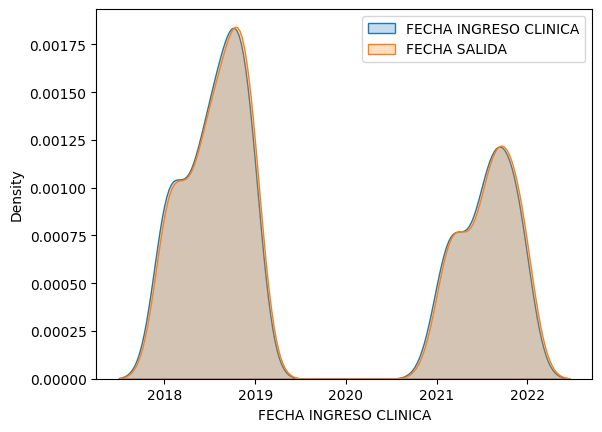

In [27]:
#grafica de densidad con FECHA INGRESO CLINICA y FECHA SALIDA
sns.kdeplot(df2["FECHA INGRESO CLINICA"], shade=True)
sns.kdeplot(df2["FECHA SALIDA"], shade=True)
plt.legend(["FECHA INGRESO CLINICA", "FECHA SALIDA"])
plt.show() # se observa que la mayoria de los pacientes ingresan y salen en el mismo dia

In [28]:
# que valores tiene Clase Funcional   
df2["Ambito según el médico"].value_counts()

Ambito según el médico
Domiciliario    61014
Ambulatorio     17886
Name: count, dtype: int64

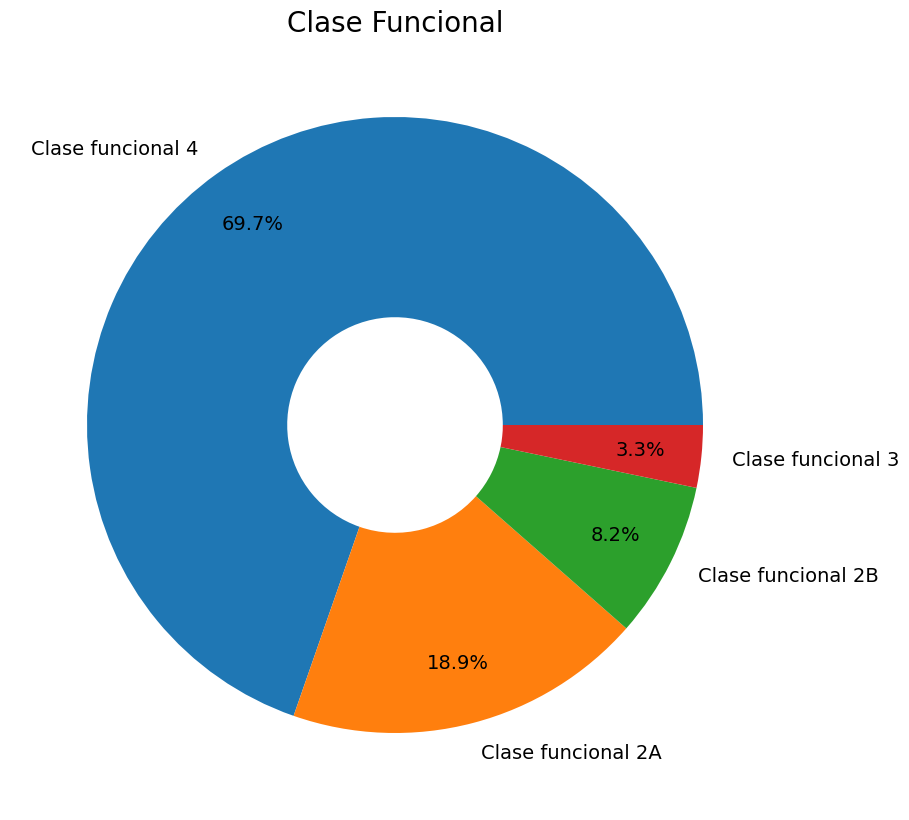

In [29]:
#hacer un diagrama circular tipo dona de la columna Clase Funcional
df2["Clase Funcional"].value_counts().plot(kind="pie",autopct='%1.1f%%',figsize=(10,10),pctdistance=0.8, wedgeprops=dict(width=0.65),textprops={'fontsize': 14})
plt.title("Clase Funcional",fontsize=20)
plt.ylabel("")
plt.show()

Se evidencia que la Clase Funcional 4 cuenta con la mayor cobertura de pacientes, representando el 69.7% del total de pacientes analizados, seguida por la Clase Funcional 2A, que comprende al 18.9% de los pacientes.

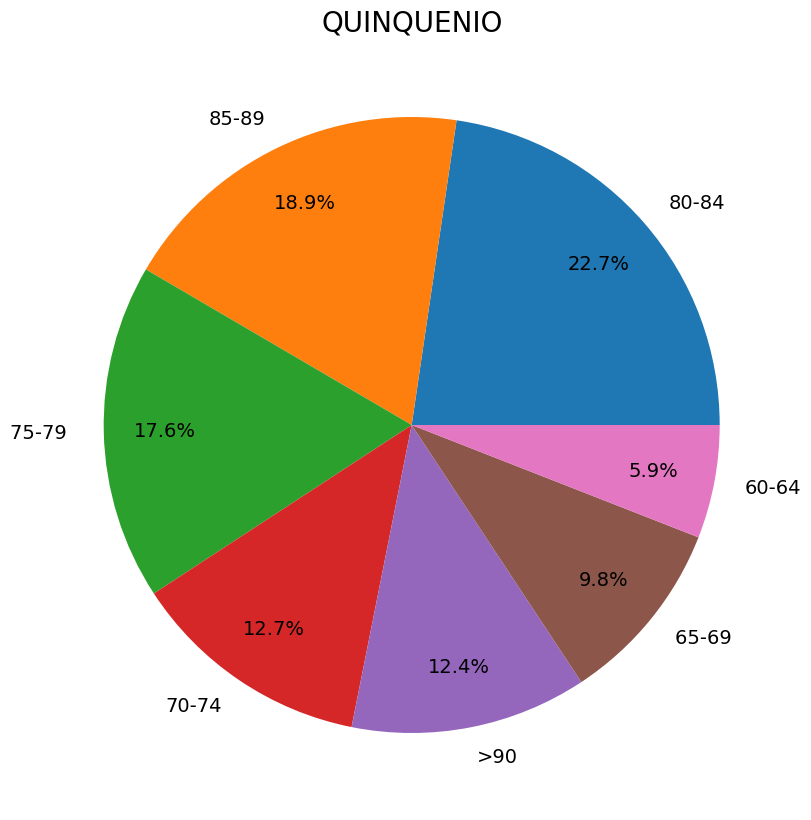

In [30]:
#hacer un diagrama circular tipo dona con QUINQUENIO de la base de datos df2
df2["QUINQUENIO"].value_counts().plot(kind="pie",autopct='%1.1f%%',figsize=(10,10),pctdistance=0.8, wedgeprops={'linewidth': 3},textprops={'fontsize': 14})
plt.title("QUINQUENIO",fontsize=20)
plt.ylabel("")
plt.show()

Se puede notar que el 22.7% de los pacientes examinados se encuentra en el grupo de edad de 80-84 años, seguido por el grupo de 85-89 años con una representación del 18.9%. Además, se destaca que el grupo con la menor representación es el de 65-69 años, con un 9.8%.

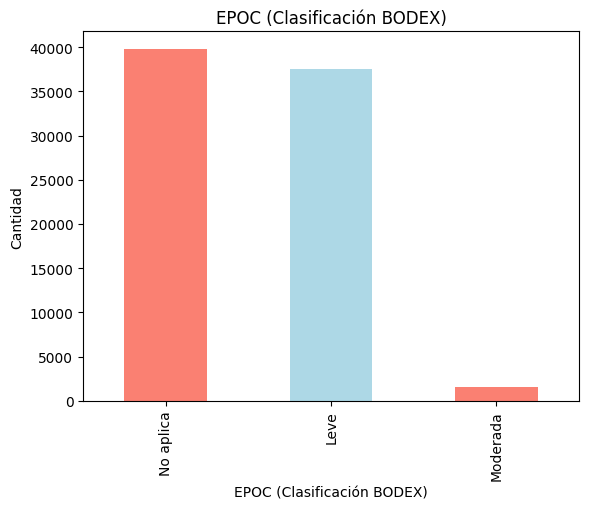

In [31]:
#analisis exploratorio de datos de la base de datos df2    categoricas en una misma grafica de colores
df2["EPOC (Clasificación BODEX)"].value_counts().plot(kind="bar",color=["salmon","lightblue"])
plt.title("EPOC (Clasificación BODEX)")
plt.xlabel("EPOC (Clasificación BODEX)")
plt.ylabel("Cantidad")
plt.show()

En el diagrama de barras, se destaca que la mayoría de los pacientes no han sido clasificados según la escala BODEX para la EPOC. No obstante, es significativo observar que aproximadamente 35,000 pacientes están clasificados como "leves", lo cual resulta relevante para el análisis

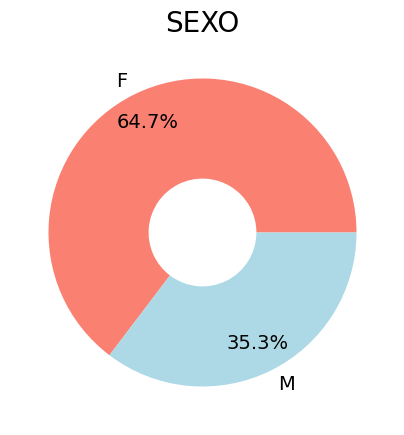

In [37]:
#diagrama circular tipo DONA con la columna SEXO con colores
df2["SEXO"].value_counts().plot(kind="pie",autopct='%1.1f%%',figsize=(5,5),pctdistance=0.8, wedgeprops=dict(width=0.65),textprops={'fontsize': 14},colors=["salmon","lightblue"])
plt.title("SEXO",fontsize=20)
plt.ylabel("")
plt.show()




En el diagrama circular, se aprecia que, entre las personas adultas dentro de la categoría de vejez analizadas, el 64.7% corresponde a mujeres y el 35.3% a hombres.

C:\Users\Juan\AppData\Local\Temp\ipykernel_10496\841128913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Tiene EPOC", data=df2, palette="Set3")


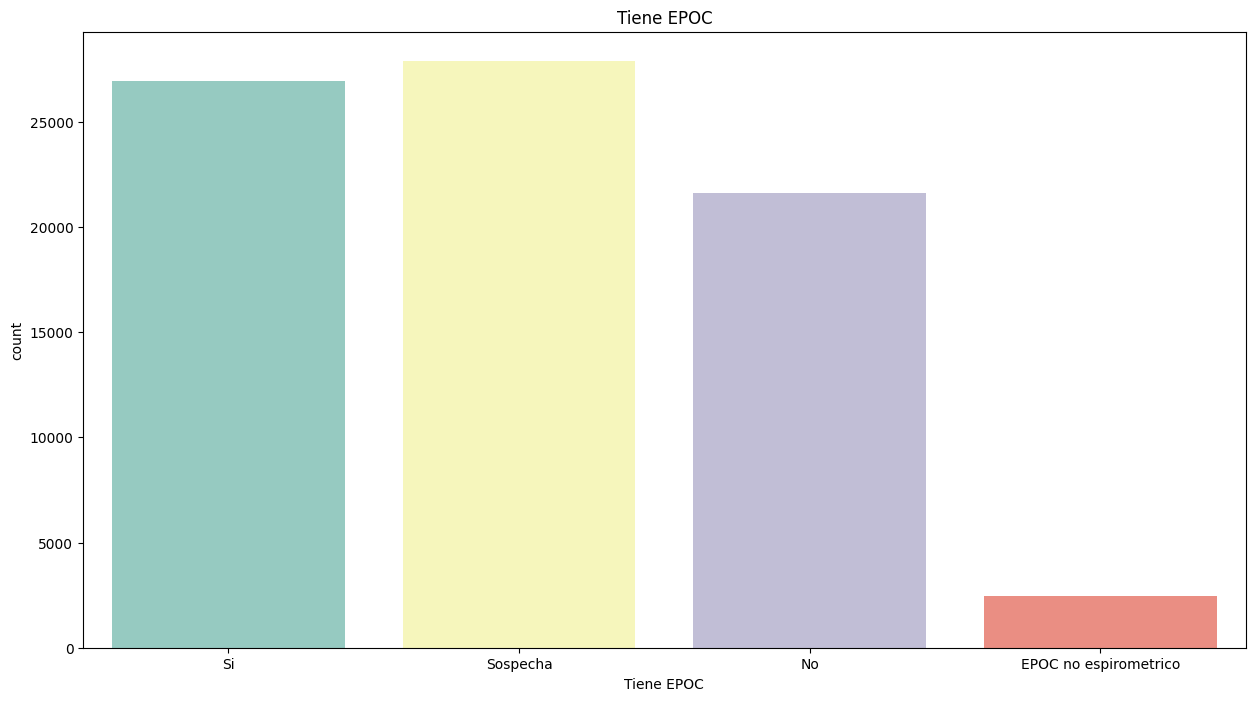

In [33]:
# SERVICIO HABILITADO barplot de las variables de la base de datos df2 con colores directamente proporcionales a la variable
plt.figure(figsize=(15,8))
sns.countplot(x="Tiene EPOC", data=df2, palette="Set3")
plt.title("Tiene EPOC")
plt.show()



En el gráfico de barras, es evidente que tanto las personas diagnosticadas con EPOC como aquellas que sospechan tener EPOC representan a más de 50,000 usuarios.

C:\Users\Juan\AppData\Local\Temp\ipykernel_10496\2660158724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ÚLTIMA CLASE FUNCIONAL", data=df2, palette="Set2")


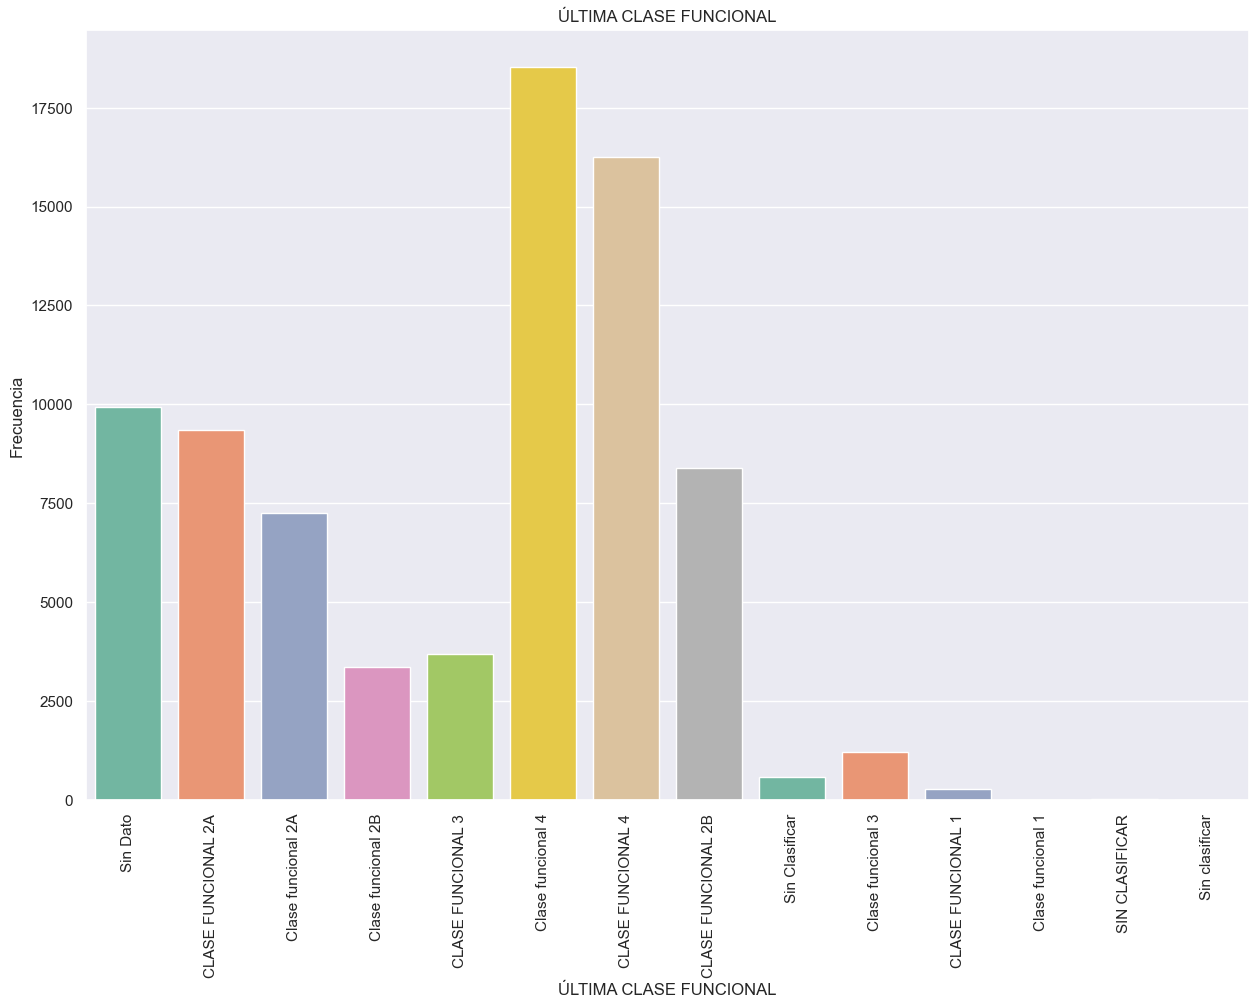

In [34]:
# ÚLTIMA CLASE FUNCIONAL barplot de las variables de la base de datos df2 con colores directamente proporcionales a la variable
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x="ÚLTIMA CLASE FUNCIONAL", data=df2, palette="Set2")
plt.title("ÚLTIMA CLASE FUNCIONAL")
plt.xlabel("ÚLTIMA CLASE FUNCIONAL")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()



Es importante notar que existen variables repetidas que requieren una organización adecuada.

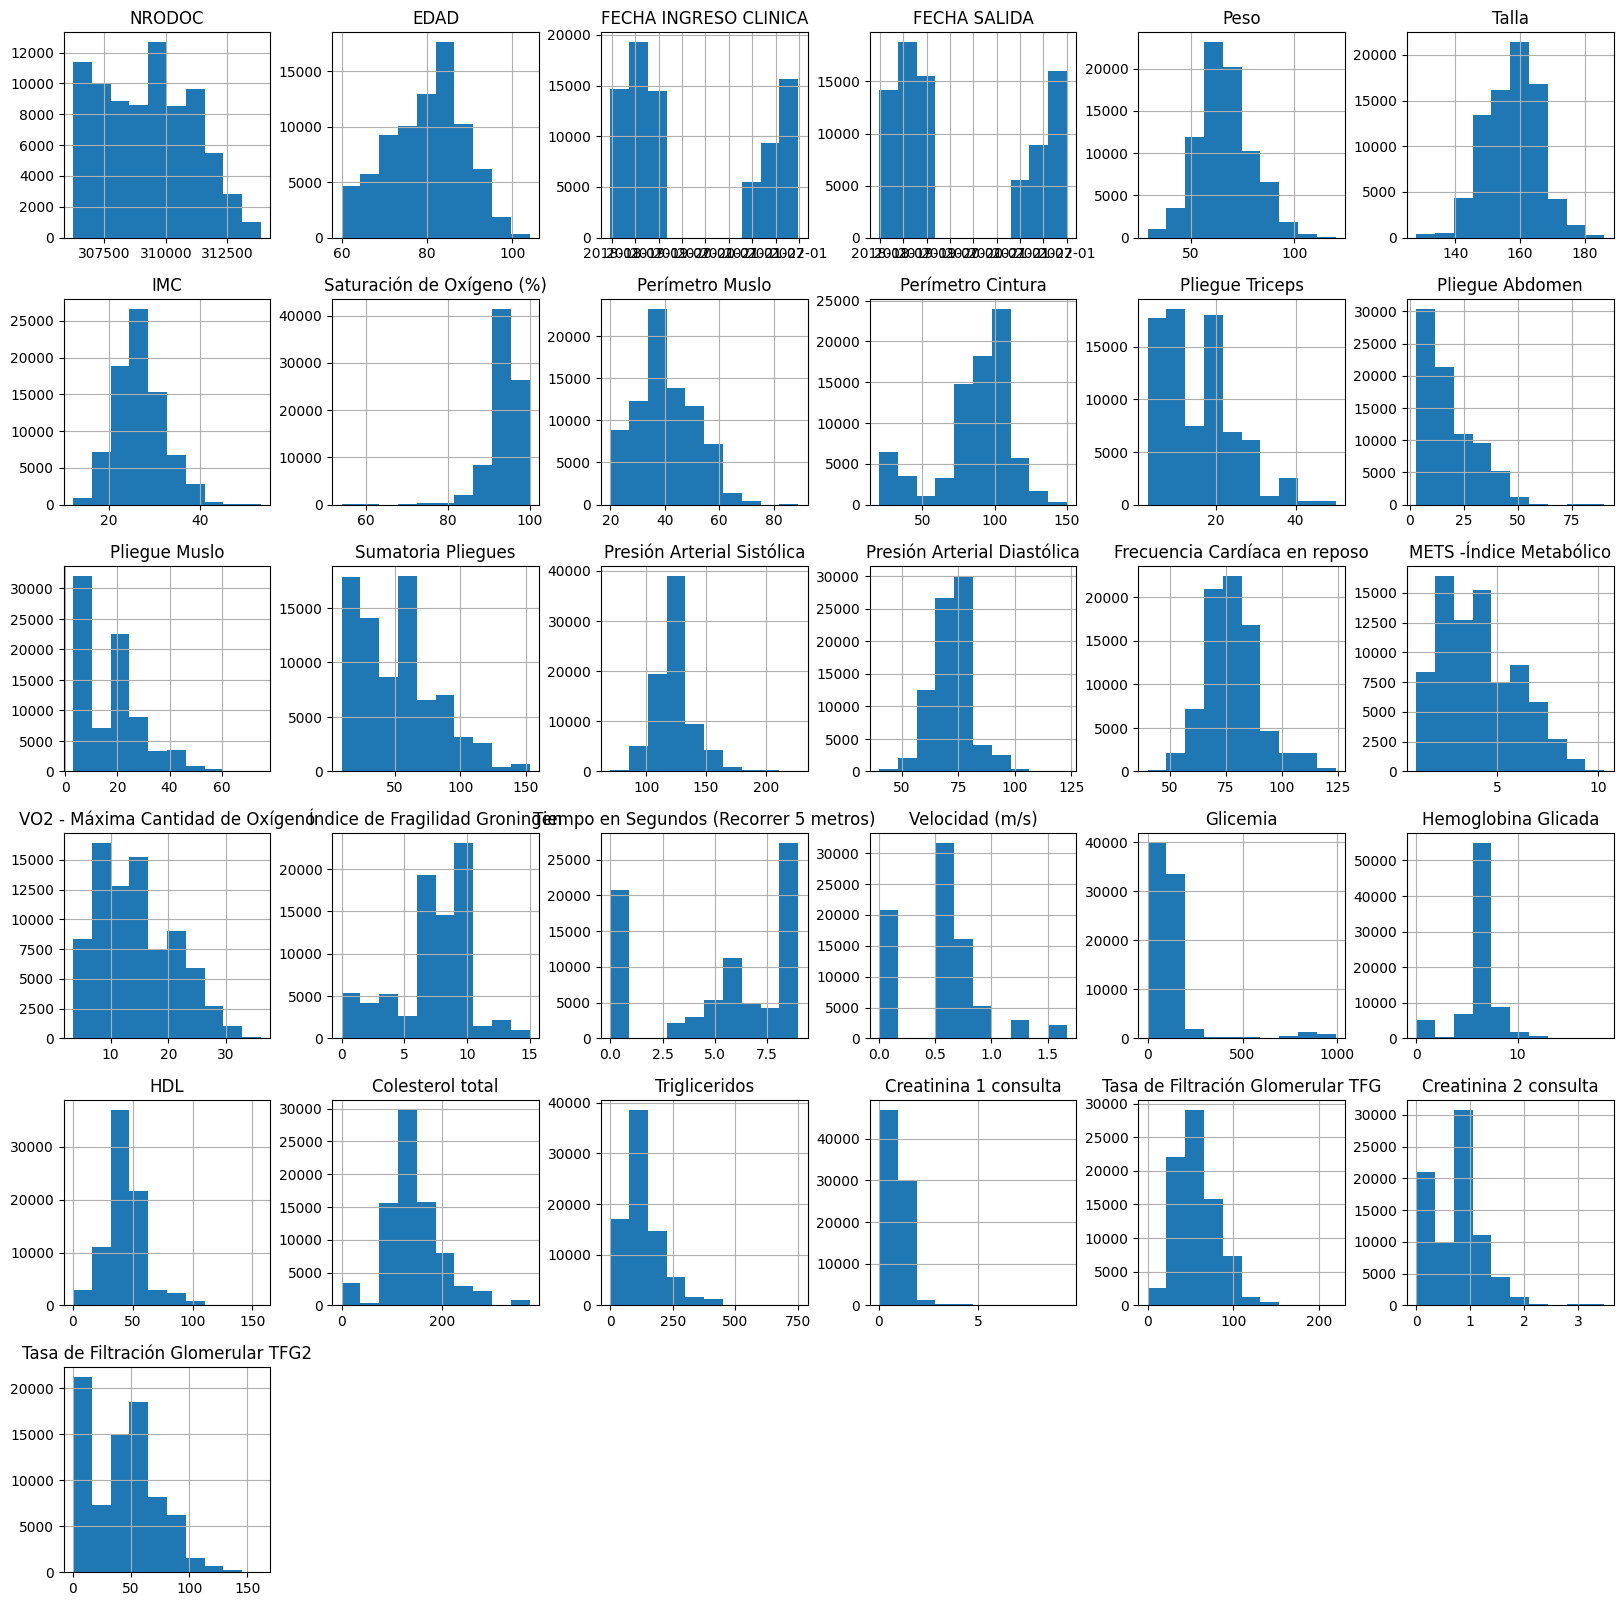

In [38]:
#grafico en un diagrama de barras de las variables de la base de datos df2
df2.hist(figsize=(20,20))
plt.show()


Se ha creado un histograma de las principales variables numéricas para revisar su comportamiento de manera gráfica.

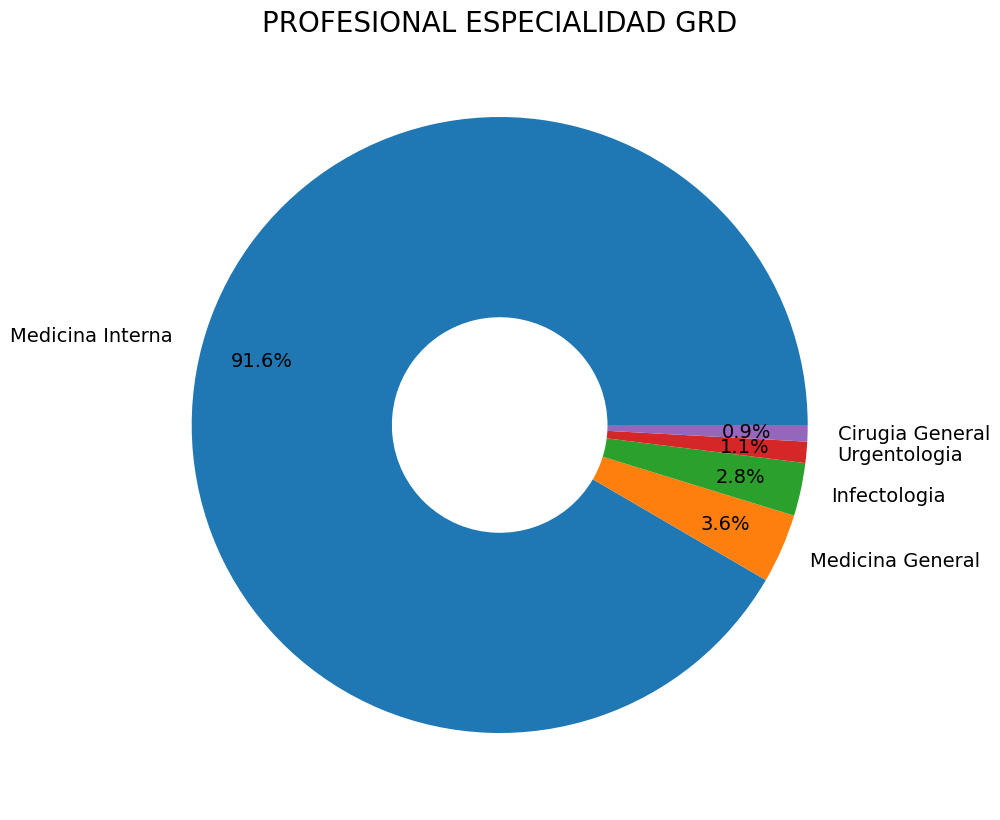

In [40]:
#hacer un diagrama circular tipo dona con PROFESIONAL ESPECIALIDAD GRD de la base de datos df2 donde solo muestras las 3 mas repetidas
df2["PROFESIONAL ESPECIALIDAD GRD"].value_counts().head().plot(kind="pie",autopct='%1.1f%%',figsize=(10,10),pctdistance=0.8, wedgeprops=dict(width=0.65),textprops={'fontsize': 14})
plt.title("PROFESIONAL ESPECIALIDAD GRD",fontsize=20)
plt.ylabel("")
plt.show()


Se puede observar que la mayoría de los pacientes son atendidos por el departamento de Medicina Interna, seguido de Cirugía General e Infectología, con un 91.6%, 3.6% y 2.8% respectivamente. Esto podría deberse en gran medida a que los pacientes analizados pertenecen a la tercera edad y requieren atención especializada en la mayoría de los casos.

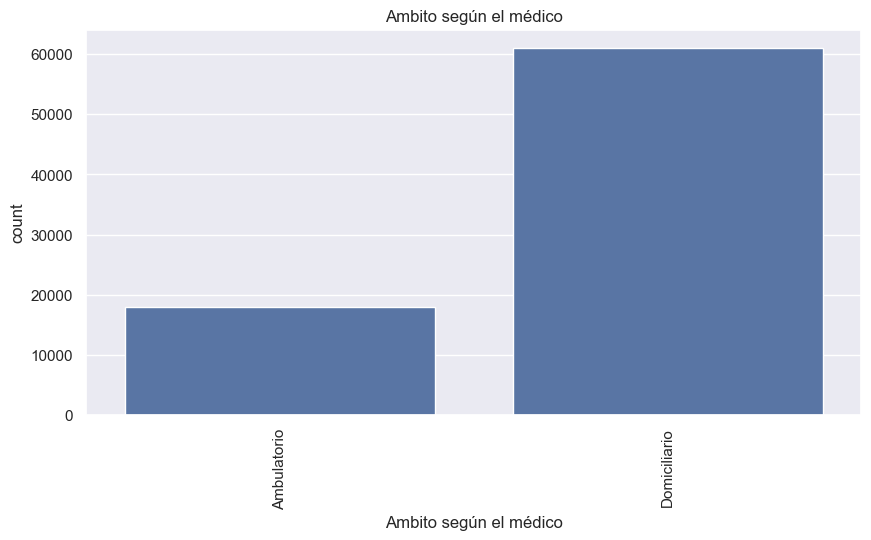

In [37]:
#grafico en un diagrama de barras la edad de los pacientes de la base de datos df2
plt.figure(figsize=(10,5))
sns.countplot(x='Ambito según el médico', data=df2)
plt.xticks(rotation=90)
plt.title('Ambito según el médico')
plt.show()


Como se puede apreciar en el gráfico, la mayoría de la atención es de carácter domiciliario, lo cual es coherente con la observación previa en la que se destacaba que la Clase Funcional 4 es la categoría predominante. En esta categoría se define a los pacientes sin estado funcional, teniendo en cuenta la aplicación del test de fragilidad, lo que indica que estos pacientes se remitirán a atención domiciliaria. 

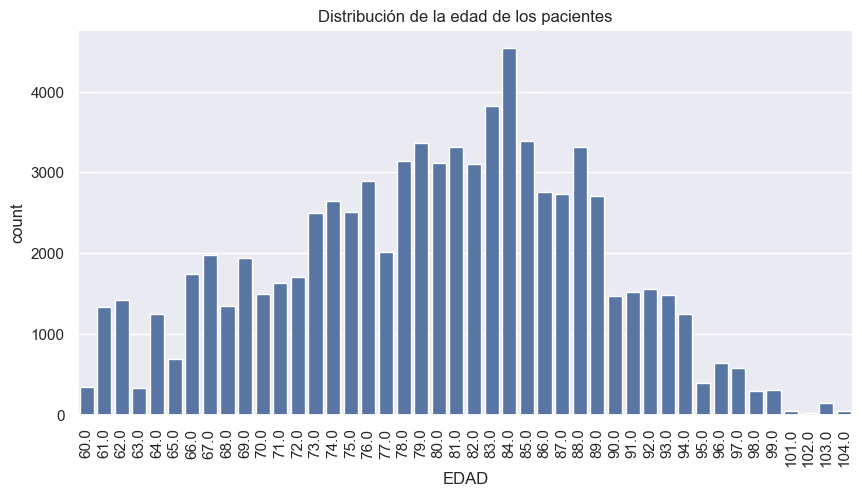

In [38]:
#grafico en un diagrama de barras la edad de los pacientes de la base de datos df2
plt.figure(figsize=(10,5))
sns.countplot(x='EDAD', data=df2)
plt.xticks(rotation=90)
plt.title('Distribución de la edad de los pacientes')
plt.show()

Como se puede observar en el gráfico, la edad que predomina con mayor frecuencia es de 84 años. No obstante, es relevante notar que en el rango de edades comprendido entre 79 y 89 años se encuentra aproximadamente el 50% de los pacientes analizados.

 ## Manejar atipicos

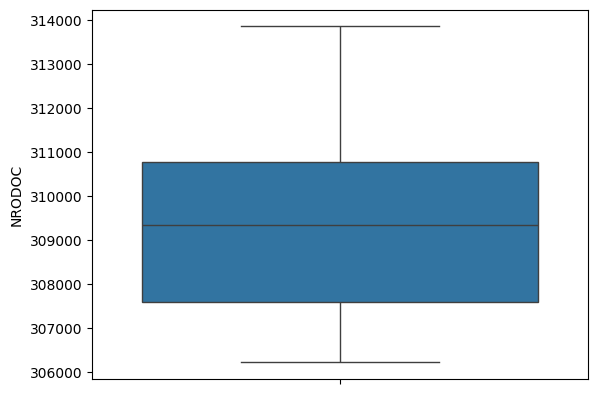

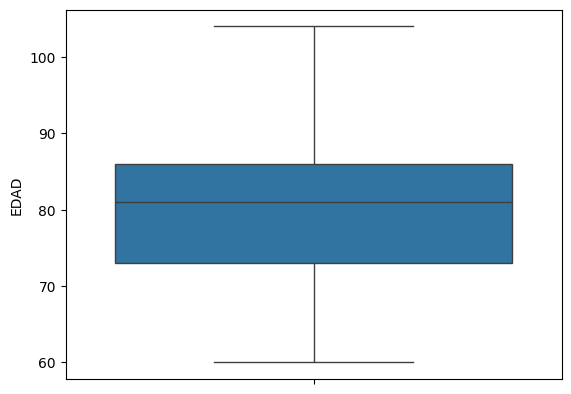

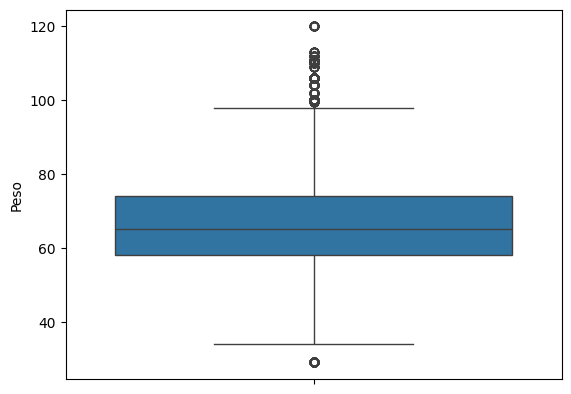

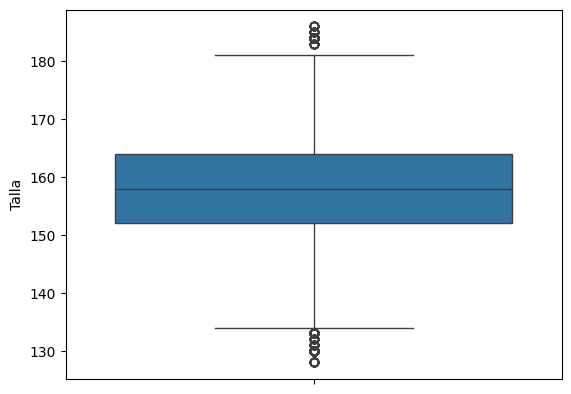

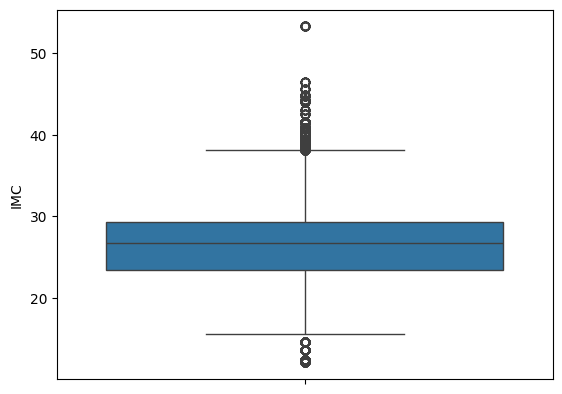

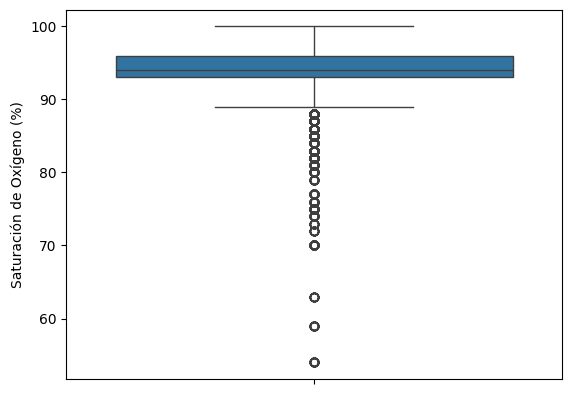

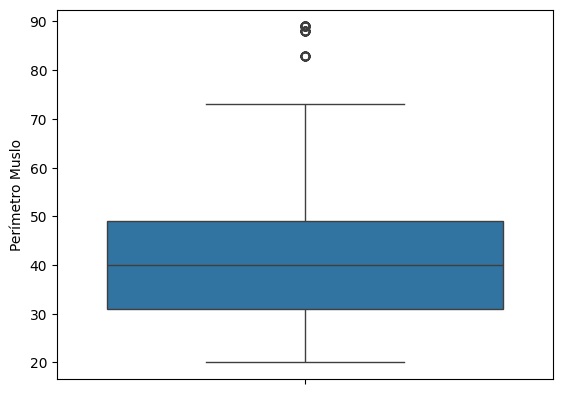

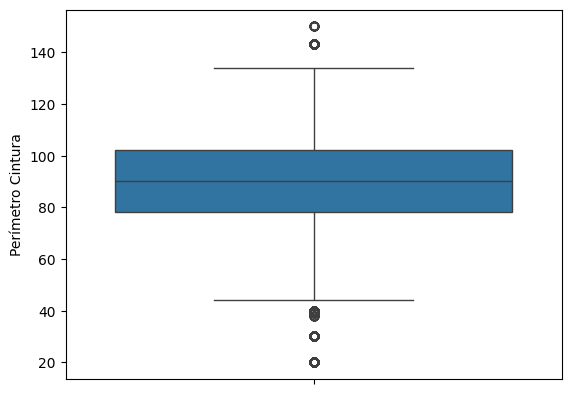

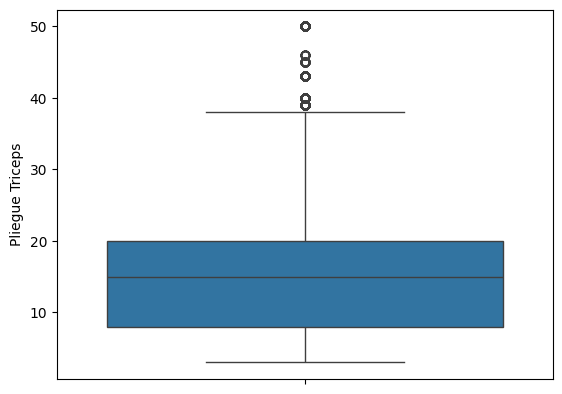

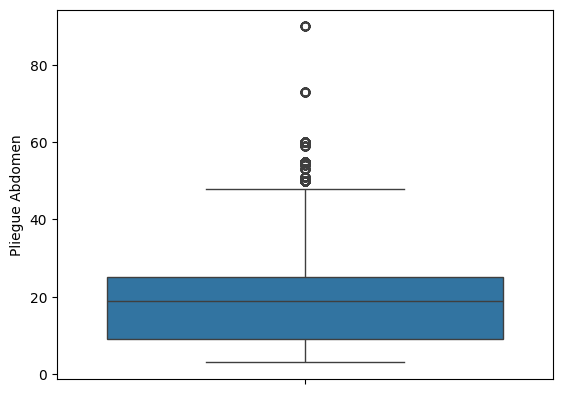

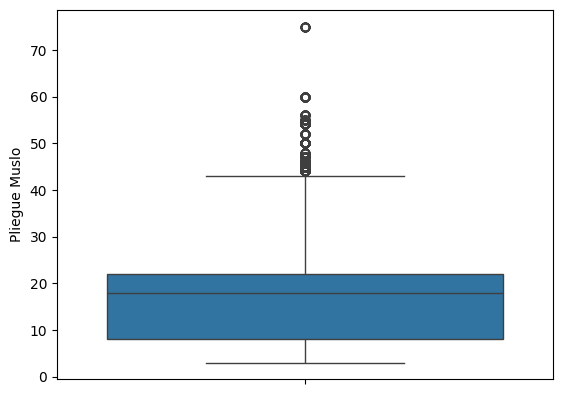

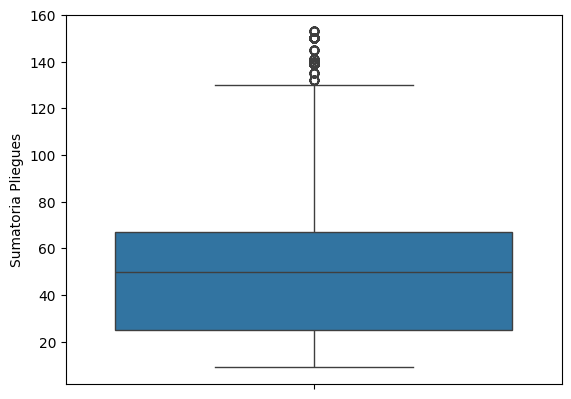

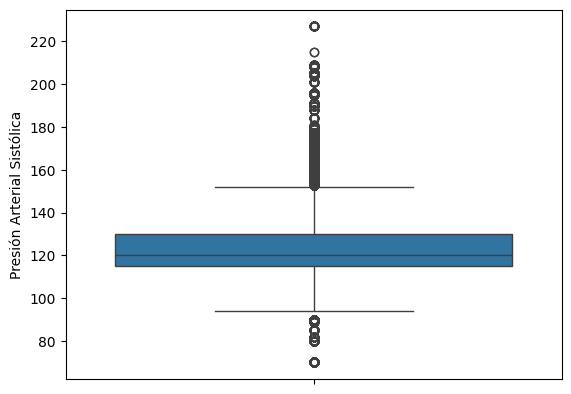

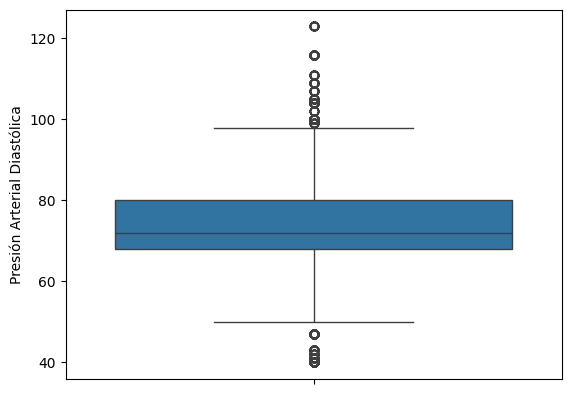

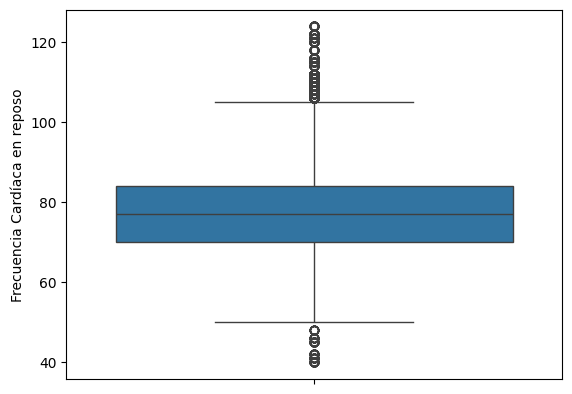

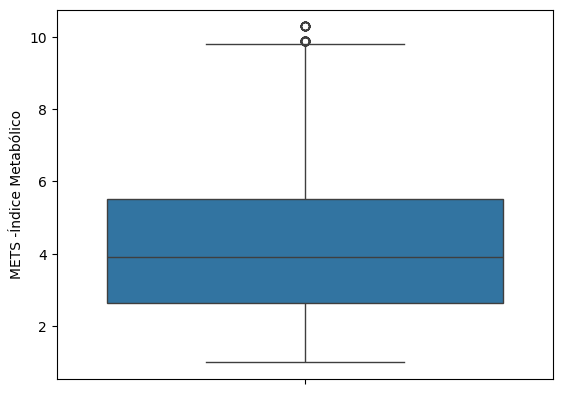

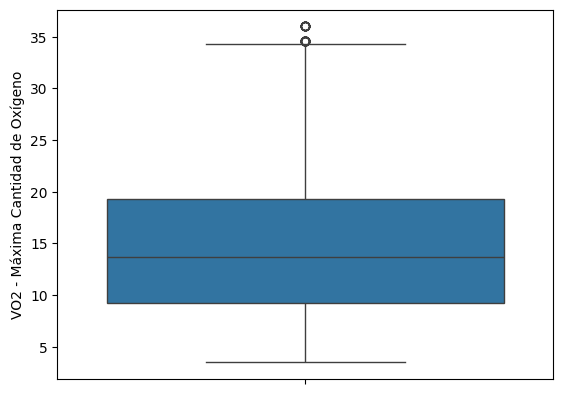

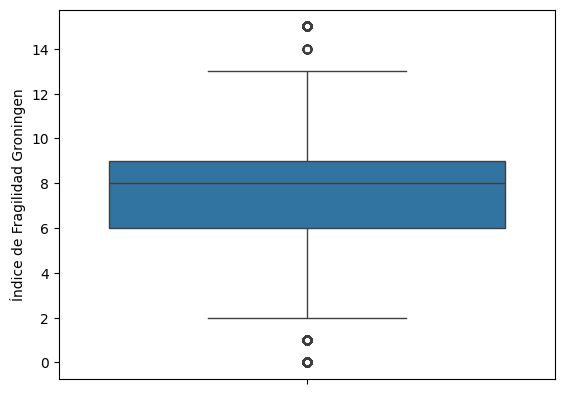

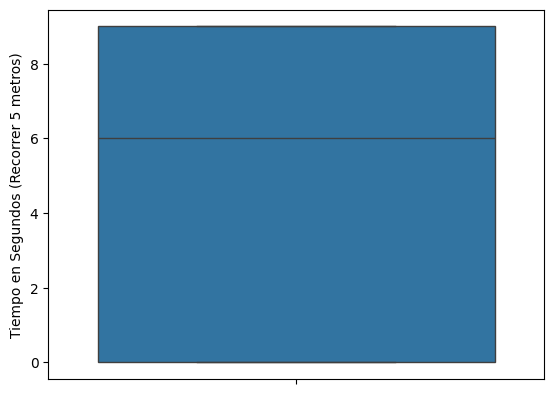

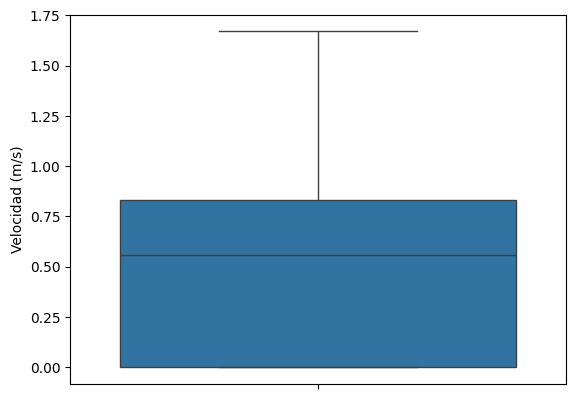

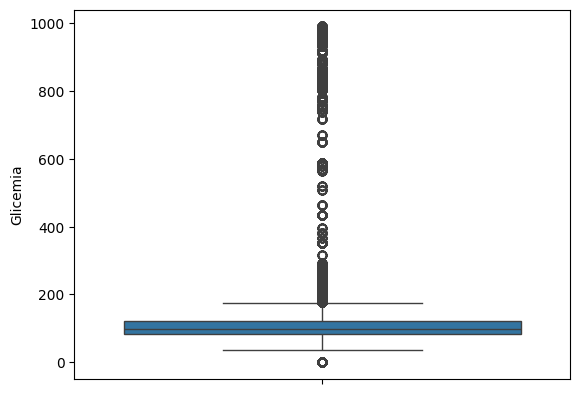

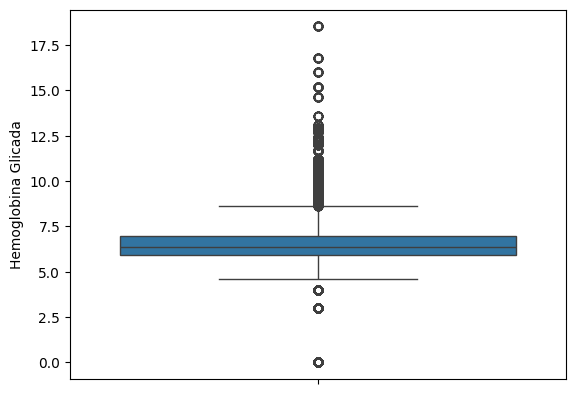

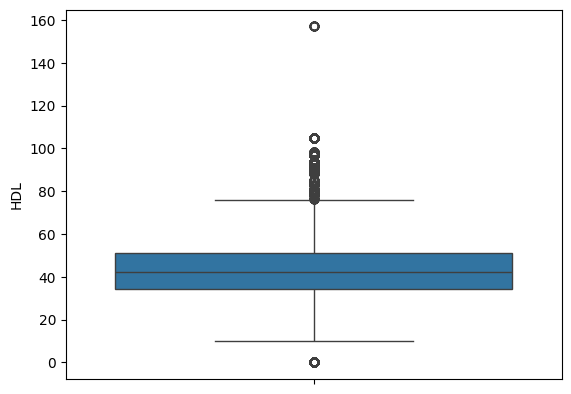

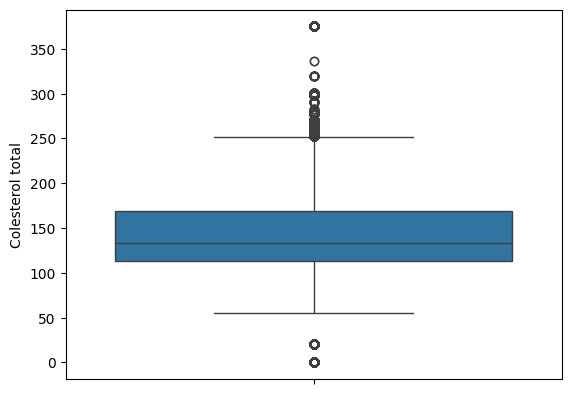

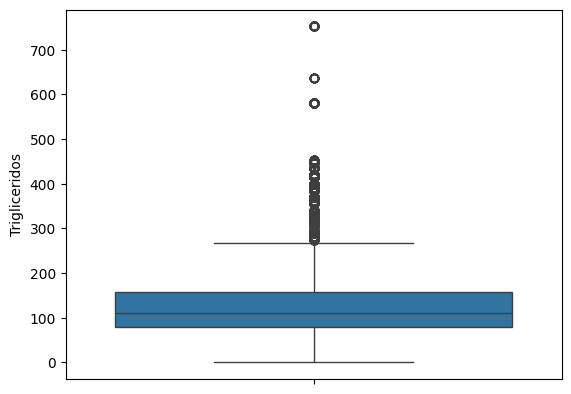

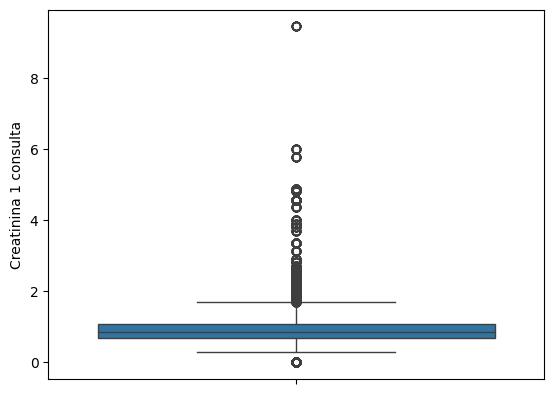

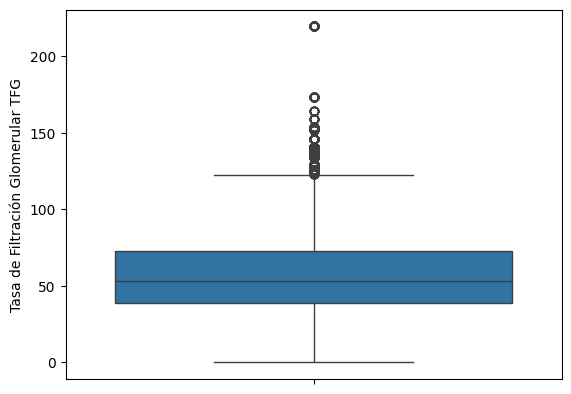

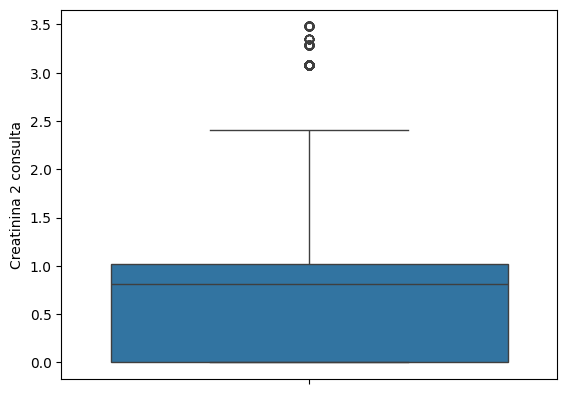

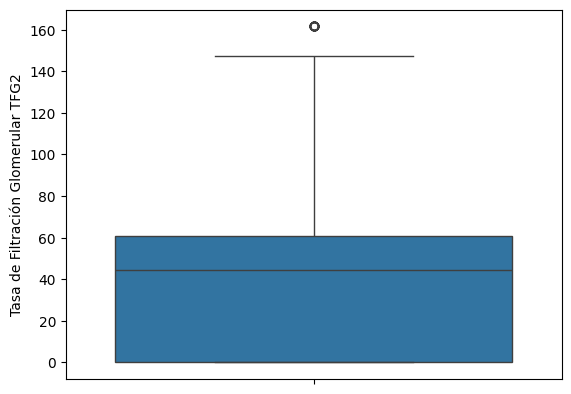

In [47]:
#graficar todos por separado los datos atipicos qie se encuentran en la base de datos df2 tipo numerico 
for i in df2.select_dtypes(include=['float64','int64']).columns:
    sns.boxplot(df2[i])
    plt.xticks(rotation=90)
    plt.show()

    




In [48]:
# se modifican  los datos atipicos de la base de datos df2 de acuerdo a sus requerimientos previamente analisasdos, de modo que no se creen sesgos base de datos df2
df2["Creatinina 1 consulta"]=df2["Creatinina 1 consulta"].apply(lambda x: 4 if x>4 else x) # se reemplazan los valores mayores a 4 ya que luego de esta valor ya es una falla en los riñones
df2["Presión Arterial Sistólica"]=df2["Presión Arterial Sistólica"].apply(lambda x: 131 if x>131 else x) # se reemplazan los valores mayores a 131 ya que luego de esta valor ya es una hipertension
df2["Presión Arterial Sistólica"]=df2["Presión Arterial Sistólica"].apply(lambda x: 81 if x<81 else x)# se reemplazan los valores menores a 81 ya que luego de esta valor ya es una hipotension
df2["Saturación de Oxígeno (%)"]=df2["Saturación de Oxígeno (%)"].apply(lambda x: 86 if x<86 else x) # se reemplazan los valores menores a 86 yaque luego de ese valor se considera hipoxia severa
df2["Glicemia"]=df2["Glicemia"].apply(lambda x: 201 if x>200 else x) # se reemplazan los valores mayores a 200 ya que luego de esta valor ya es una hiperglicemia
df2["ÚLTIMA CLASE FUNCIONAL"]=df2["ÚLTIMA CLASE FUNCIONAL"].replace(["Clase funcional 4","Clase funcional 2A","Clase funcional 2B","Clase funcional 3","Clase funcional 1","Sin clasificar"],["CLASE FUNCIONAL 4","CLASE FUNCIONAL 2A","CLASE FUNCIONAL 2B","CLASE FUNCIONAL 3","CLASE FUNCIONAL 1","Sin Dato"])
df2["ÚLTIMA CLASE FUNCIONAL"]=df2["ÚLTIMA CLASE FUNCIONAL"].replace(["Sin Clasificar","SIN CLASIFICAR"],"Sin Dato") # se decide reemplazar la Sin Clasificar, SIN CLASIFICAR por sin dato


##  Transformar las variables categoricas

In [49]:
#convertir las columnas categoricas de la base de datos df2 en numericas por el metodo de   one hot encoding
df2["SEXO_F"] = (df2["SEXO"] == "F").astype(int)
df2["SEXO_M"] = (df2["SEXO"] == "M").astype(int)

df2["ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 1"] = (df2["ÚLTIMA CLASE FUNCIONAL"] == "CLASE FUNCIONAL 1").astype(int)
df2["ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 2A"] = (df2["ÚLTIMA CLASE FUNCIONAL"] == "CLASE FUNCIONAL 2A").astype(int)
df2["ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 2B"] = (df2["ÚLTIMA CLASE FUNCIONAL"] == "CLASE FUNCIONAL 2B").astype(int)
df2["ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 3"] = (df2["ÚLTIMA CLASE FUNCIONAL"] == "CLASE FUNCIONAL 3").astype(int)
df2["ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 4"] = (df2["ÚLTIMA CLASE FUNCIONAL"] == "CLASE FUNCIONAL 4").astype(int)
df2["ÚLTIMA CLASE FUNCIONAL_Sin Dato"] = (df2["ÚLTIMA CLASE FUNCIONAL"] == "Sin Dato").astype(int)

df2["SERVICIO HABILITADO_General adultos"] = (df2["SERVICIO HABILITADO"] == "General adultos").astype(int)
df2["SERVICIO HABILITADO_Urgencias >= 24 horas"] = (df2["SERVICIO HABILITADO"] == "Urgencias >= 24 horas").astype(int)
df2["SERVICIO HABILITADO_Cuidado Intermedio Adultos"] = (df2["SERVICIO HABILITADO"] == "Cuidado Intermedio Adultos").astype(int)
df2["SERVICIO HABILITADO_Cuidado Intensivo Adultos"] = (df2["SERVICIO HABILITADO"] == "Cuidado Intensivo Adultos").astype(int)
df2["SERVICIO HABILITADO_Urgencias < 24 horas"] = (df2["SERVICIO HABILITADO"] == "Urgencias < 24 horas").astype(int)

df2["BLOQUE ANTERIOR_Bloque 1"] = (df2["BLOQUE ANTERIOR"] == "Bloque 1").astype(int)
df2["BLOQUE ANTERIOR_Bloque 2"] = (df2["BLOQUE ANTERIOR"] == "Bloque 2").astype(int)
df2["BLOQUE ANTERIOR_Bloque 3"] = (df2["BLOQUE ANTERIOR"] == "Bloque 3").astype(int)
df2["BLOQUE ANTERIOR_Sin Informacion"] = (df2["BLOQUE ANTERIOR"] == "Sin Informacion").astype(int)

df2["VIA INGRESO_Urgencias"] = (df2["VIA INGRESO"] == "Urgencias").astype(int)
df2["VIA INGRESO_Remitido"] = (df2["VIA INGRESO"] == "Remitido").astype(int)
df2["VIA INGRESO_Consulta Externa ó Programada"] = (df2["VIA INGRESO"] == "Consulta Externa ó Programada").astype(int)

df2["BLOQUE_Bloque 1"] = (df2["BLOQUE"] == "Bloque 1").astype(int)
df2["BLOQUE_Bloque 3"] = (df2["BLOQUE"] == "Bloque 3").astype(int)

df2["UNIDAD ESTRATEGICA_Hospitalizacion Adultos"] = (df2["UNIDAD ESTRATEGICA"] == "Hospitalizacion Adultos").astype(int)
df2["UNIDAD ESTRATEGICA_Urgencias"] = (df2["UNIDAD ESTRATEGICA"] == "Urgencias").astype(int)
df2["UNIDAD ESTRATEGICA_CUIDADOS ESPECIALES"] = (df2["UNIDAD ESTRATEGICA"] == "CUIDADOS ESPECIALES").astype(int)
df2["UNIDAD ESTRATEGICA_UCI Adultos"] = (df2["UNIDAD ESTRATEGICA"] == "UCI Adultos").astype(int)

df2["TIPO EGRESO_Alta Médica"] = (df2["TIPO EGRESO"] == "Alta Médica").astype(int)
df2["TIPO EGRESO_Fallece"] = (df2["TIPO EGRESO"] == "Fallece").astype(int)
df2["TIPO EGRESO_Remisión a otra institución"] = (df2["TIPO EGRESO"] == "Remisión a otra institución").astype(int)
df2["TIPO EGRESO_Alta Voluntaria"] = (df2["TIPO EGRESO"] == "Alta Voluntaria").astype(int)

df2["ANTIBIOTICO_No"] = (df2["ANTIBIOTICO"] == "NO").astype(int)
df2["ANTIBIOTICO_Si"] = (df2["ANTIBIOTICO"] == "SI").astype(int)

df2["PROFESIONAL ESPECIALIDAD GRD_Medicina Interna"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Medicina Interna").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Medicina General"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Medicina General").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Infectologia"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Infectologia").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Urgentologia"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Urgentologia").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Cirugia General"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Cirugia General").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Cirugia General"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Cirugia General").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Cirugia Torax"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Cirugia Torax").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Cirugia Maxilofacial"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Cirugia Maxilofacial").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Intensivista"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Intensivista").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Otorrinolaringologia"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Otorrinolaringologia").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Cirugia Hepatobiliopancreatica"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Cirugia Hepatobiliopancreatica").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Terapia Respiratoria"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Terapia Respiratoria").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Cirugia Cardiovascular"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Cirugia Cardiovascular").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Nefrologia"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Nefrologia").astype(int)

df2["Clasificación IMC_Bajo"] = (df2["Clasificación IMC"] == "Bajo").astype(int)
df2["Clasificación IMC_Normal"] = (df2["Clasificación IMC"] == "Normal").astype(int)
df2["Clasificación IMC_Sobrepeso"] = (df2["Clasificación IMC"] == "Sobrepeso").astype(int)
df2["Clasificación IMC_Obesidad Grasa"] = (df2["Clasificación IMC"] == "Obesidad Grasa").astype(int)

df2["Calificación (Índice de Fragilidad)_Robusto"] = (df2["Calificación (Índice de Fragilidad)"] == "Frágil").astype(int)
df2["Calificación (Índice de Fragilidad)_Pre-frágil"] = (df2["Calificación (Índice de Fragilidad)"] == "Normal").astype(int)

df2["Calificación (Apoyo Monopodal)_Malo - Fragil"] = (df2["Calificación (Apoyo Monopodal)"] == "Malo - Fragil").astype(int)
df2["Calificación (Apoyo Monopodal)_Aceptable"] = (df2["Calificación (Apoyo Monopodal)"] == "Aceptable").astype(int)
df2["Calificación (Apoyo Monopodal)_Bueno"] = (df2["Calificación (Apoyo Monopodal)"] == "Bueno").astype(int)

df2["Calificación (Apoyo Monopodal)_Malo - Frágil"] = (df2["Calificación (Apoyo Monopodal)"] == "Malo - Frágil").astype(int)
df2["Calificación Velocidad_Deficiente"] = (df2["Calificación Velocidad"] == "Deficiente").astype(int)
df2["Calificación Velocidad_Aceptable"] = (df2["Calificación Velocidad"] == "Aceptable").astype(int)
df2["Calificación Velocidad_Bueno"] = (df2["Calificación Velocidad"] == "Bueno").astype(int)

df2["Test Findrisc_No aplica"] = (df2["Test Findrisc"] == "No aplica").astype(int)
df2["Test Findrisc_Alta Probabilidad de Diabetes"] = (df2["Test Findrisc"] == "Alta Probabilidad de Diabetes").astype(int)
df2["Test Findrisc_Baja Probabilidad de Diabetes"] = (df2["Test Findrisc"] == "Baja Probabilidad de Diabetes").astype(int)

df2["Índice Tobillo/Brazo_Normal"] = (df2["Índice Tobillo/Brazo"] == "0.91 - 1.30 Normal").astype(int)
df2["Índice Tobillo/Brazo_0"] = (df2["Índice Tobillo/Brazo"] == "0").astype(int)
df2["Índice Tobillo/Brazo_nfermedad arterial periférica leve a moderada"] = (df2["Índice Tobillo/Brazo"] == "0.41 - 0.90 Enfermedad arterial periférica leve a moderada").astype(int)
df2["Índice Tobillo/Brazo_Grave"] = (df2["Índice Tobillo/Brazo"] == "<0.4 EAP Grave").astype(int)

df2["Diabetes Mellitus_No"] = (df2["Diabetes Mellitus"] == "NO").astype(int)
df2["Diabetes Mellitus_Si"] = (df2["Diabetes Mellitus"] == "SI").astype(int)

df2["Tipo diabetes mellitus_No aplica"] = (df2["Tipo diabetes mellitus"] == "No aplica").astype(int)
df2["Tipo diabetes mellitus_Diabetes Mellitus Tipo 2 No Insulinorrequiriente"] = (df2["Tipo diabetes mellitus"] == "Diabetes Mellitus Tipo 2 No Insulinorrequiriente").astype(int)
df2["Tipo diabetes mellitus_Diabetes Mellitus Tipo 2 Insuinorrequiriente"] = (df2["Tipo diabetes mellitus"] == "Diabetes Mellitus Tipo 2 Insuinorrequiriente").astype(int)

df2["Control Diabetes_No aplica"] = (df2["Control Diabetes"] == "No aplica").astype(int)
df2["Control Diabetes_controlada"] = (df2["Control Diabetes"] == "controlada").astype(int)
df2["Control Diabetes_No controlada"] = (df2["Control Diabetes"] == "No controlada").astype(int)
df2["Control Diabetes_Falta hemoglobina"] = (df2["Control Diabetes"] == "Falta hemoglobina").astype(int)

df2["Tiene HTA_No"] = (df2["Tiene HTA"] == "No").astype(int)
df2["Tiene HTA_Si"] = (df2["Tiene HTA"] == "Si").astype(int)

df2["Control HTA_No aplica"] = (df2["Control HTA"] == "No aplica").astype(int)  
df2["Control HTA_controlada"] = (df2["Control HTA"] == "controlada").astype(int)
df2["Control HTA_No controlada"] = (df2["Control HTA"] == "No controlada").astype(int)

df2["Tiene EPOC_No"] = (df2["Tiene EPOC"] == "No").astype(int)
df2["Tiene EPOC_Si"] = (df2["Tiene EPOC"] == "Si").astype(int)
df2["Tiene EPOC_Sospecha"] = (df2["Tiene EPOC"] == "Sospecha").astype(int)
df2["Tiene EPOC_EPOC no espirometrico"] = (df2["Tiene EPOC"] == "EPOC no espirometrico").astype(int)

df2["EPOC (Clasificación BODEX)_No aplica"] = (df2["EPOC (Clasificación BODEX)"] == "No aplica").astype(int)
df2["EPOC (Clasificación BODEX)_Leve"] = (df2["EPOC (Clasificación BODEX)"] == "Leve").astype(int)
df2["EPOC (Clasificación BODEX)_Moderada"] = (df2["EPOC (Clasificación BODEX)"] == "Moderada").astype(int)

df2["Sufre de alguna enfermedad cardiovascular_No"] = (df2["Sufre de alguna enfermedad cardiovascular"] == "No").astype(int)
df2["Sufre de alguna enfermedad cardiovascular_Si"] = (df2["Sufre de alguna enfermedad cardiovascular"] == "Si").astype(int)

df2["Tabaquismo_No"] = (df2["Tabaquismo"] == "No").astype(int)
df2["Tabaquismo_Si"] = (df2["Tabaquismo"] == "Si").astype(int)
df2["Tabaquismo_Ex-fumador"] = (df2["Tabaquismo"] == "Ex-fumador").astype(int)

df2["Clasificación de Framinghan_Bajo riesgo"] = (df2["Clasificación de Framinghan"] == "Bajo riesgo").astype(int)
df2["Clasificación de Framinghan_Alto riesgo"] = (df2["Clasificación de Framinghan"] == "Alto riesgo").astype(int)

df2["Estadio de la Enfermedad Renal_Estadio 0"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 0").astype(int)
df2["Estadio de la Enfermedad Renal_Estadio 1"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 1").astype(int)
df2["Estadio de la Enfermedad Renal_Estadio 2"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 2").astype(int)
df2["Estadio de la Enfermedad Renal_Estadio 3A"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 3A").astype(int)
df2["Estadio de la Enfermedad Renal_Estadio 3B"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 3B").astype(int)
df2["Estadio de la Enfermedad Renal_Estadio 4"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 4").astype(int)
df2["Estadio de la Enfermedad Renal_Estadio 5"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 5").astype(int)

df2["Clase Funcional_Clase funcional 4"] = (df2["Clase Funcional"] == "Clase funcional 4").astype(int)
df2["Clase Funcional_Clase funcional 2A"] = (df2["Clase Funcional"] == "Clase funcional 2A").astype(int)
df2["Clase Funcional_Clase funcional 2B"] = (df2["Clase Funcional"] == "Clase funcional 2B").astype(int)
df2["Clase Funcional_Clase funcional 3"] = (df2["Clase Funcional"] == "Clase funcional 3").astype(int)

df2["Remisión_Grupal 4"] = (df2["Remisión"] == "Grupal 4").astype(int)
df2["Remisión_Grupal 2"] = (df2["Remisión"] == "Grupal 2").astype(int)
df2["Remisión_Grupal 3"] = (df2["Remisión"] == "Grupal 3").astype(int)
df2["Remisión_Grupal 1"] = (df2["Remisión"] == "Grupal 1").astype(int)

df2["Tiene próximo control_No"] = (df2["Tiene próximo control"] == "No").astype(int)
df2["Tiene próximo control_Si"] = (df2["Tiene próximo control"] == "Si").astype(int)

df2["Requiere cita de morbilidad_No"] = (df2["Requiere cita de morbilidad"] == "No").astype(int)
df2["Requiere cita de morbilidad_Si"] = (df2["Requiere cita de morbilidad"] == "Si").astype(int)

df2["Ambito según el médico_Domiciliario"] = (df2["Ambito según el médico"] == "Domiciliario").astype(int)
df2["Ambito según el médico_Ambulatorio"] = (df2["Ambito según el médico"] == "Ambulatorio").astype(int)

df2["QUINQUENIO_80-84"] = (df2["QUINQUENIO"] == "80-84").astype(int)
df2["QUINQUENIO_85-89"] = (df2["QUINQUENIO"] == "85-89").astype(int)
df2["QUINQUENIO_75-79"] = (df2["QUINQUENIO"] == "75-79").astype(int)
df2["QUINQUENIO_70-74"] = (df2["QUINQUENIO"] == "70-74").astype(int)
df2["QUINQUENIO_>90"] = (df2["QUINQUENIO"] == ">90").astype(int)
df2["QUINQUENIO_65-69"] = (df2["QUINQUENIO"] == "65-69").astype(int)
df2["QUINQUENIO_60-64"] = (df2["QUINQUENIO"] == "60-64").astype(int)

C:\Users\Juan\AppData\Local\Temp\ipykernel_6696\2762676521.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2["Test Findrisc_Baja Probabilidad de Diabetes"] = (df2["Test Findrisc"] == "Baja Probabilidad de Diabetes").astype(int)
C:\Users\Juan\AppData\Local\Temp\ipykernel_6696\2762676521.py:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2["Índice Tobillo/Brazo_Normal"] = (df2["Índice Tobillo/Brazo"] == "0.91 - 1.30 Normal").astype(int)
C:\Users\Juan\AppData\Local\Temp\ipykernel_6696\2762676521.py:80: PerformanceWarning

In [50]:
#crea una base de datos con las columnas numericas de la base de datos df2
df2_num=df2.select_dtypes(include=np.number)

In [51]:
#CUANTAS VARIABLES QUEDARON EN LA BASE DE DATOS DF2
df2_num.shape

(78900, 151)

## Correlación de variables

In [52]:
#se crea una base de datos llamada df3_num con las columnas numericas de la base de datos df2 que tienen una correlacion mayor a 0.11 o menor a -0.11 con la variable TIEMPO DE ESTANCIA
df3_num=df2_num[df2_num.columns[df2_num.corr()['TIEMPO DE ESTANCIA']>0.11].tolist()+df2_num.columns[df2_num.corr()['TIEMPO DE ESTANCIA']<-0.11].tolist()]

In [44]:
# ahora la base de datos df3_num tiene  28 columnas y 78900 filas
df3_num.shape

(78900, 28)

In [53]:
# tipo  df3_num 
df3_num.dtypes

HDL                                                      float64
Colesterol total                                         float64
TIEMPO DE ESTANCIA                               timedelta64[ns]
SERVICIO HABILITADO_General adultos                        int32
SERVICIO HABILITADO_Cuidado Intensivo Adultos              int32
BLOQUE ANTERIOR_Bloque 1                                   int32
BLOQUE_Bloque 1                                            int32
UNIDAD ESTRATEGICA_Hospitalizacion Adultos                 int32
UNIDAD ESTRATEGICA_UCI Adultos                             int32
ANTIBIOTICO_Si                                             int32
PROFESIONAL ESPECIALIDAD GRD_Infectologia                  int32
PROFESIONAL ESPECIALIDAD GRD_Intensivista                  int32
Estadio de la Enfermedad Renal_Estadio 2                   int32
Clase Funcional_Clase funcional 4                          int32
Remisión_Grupal 4                                          int32
EDAD                     

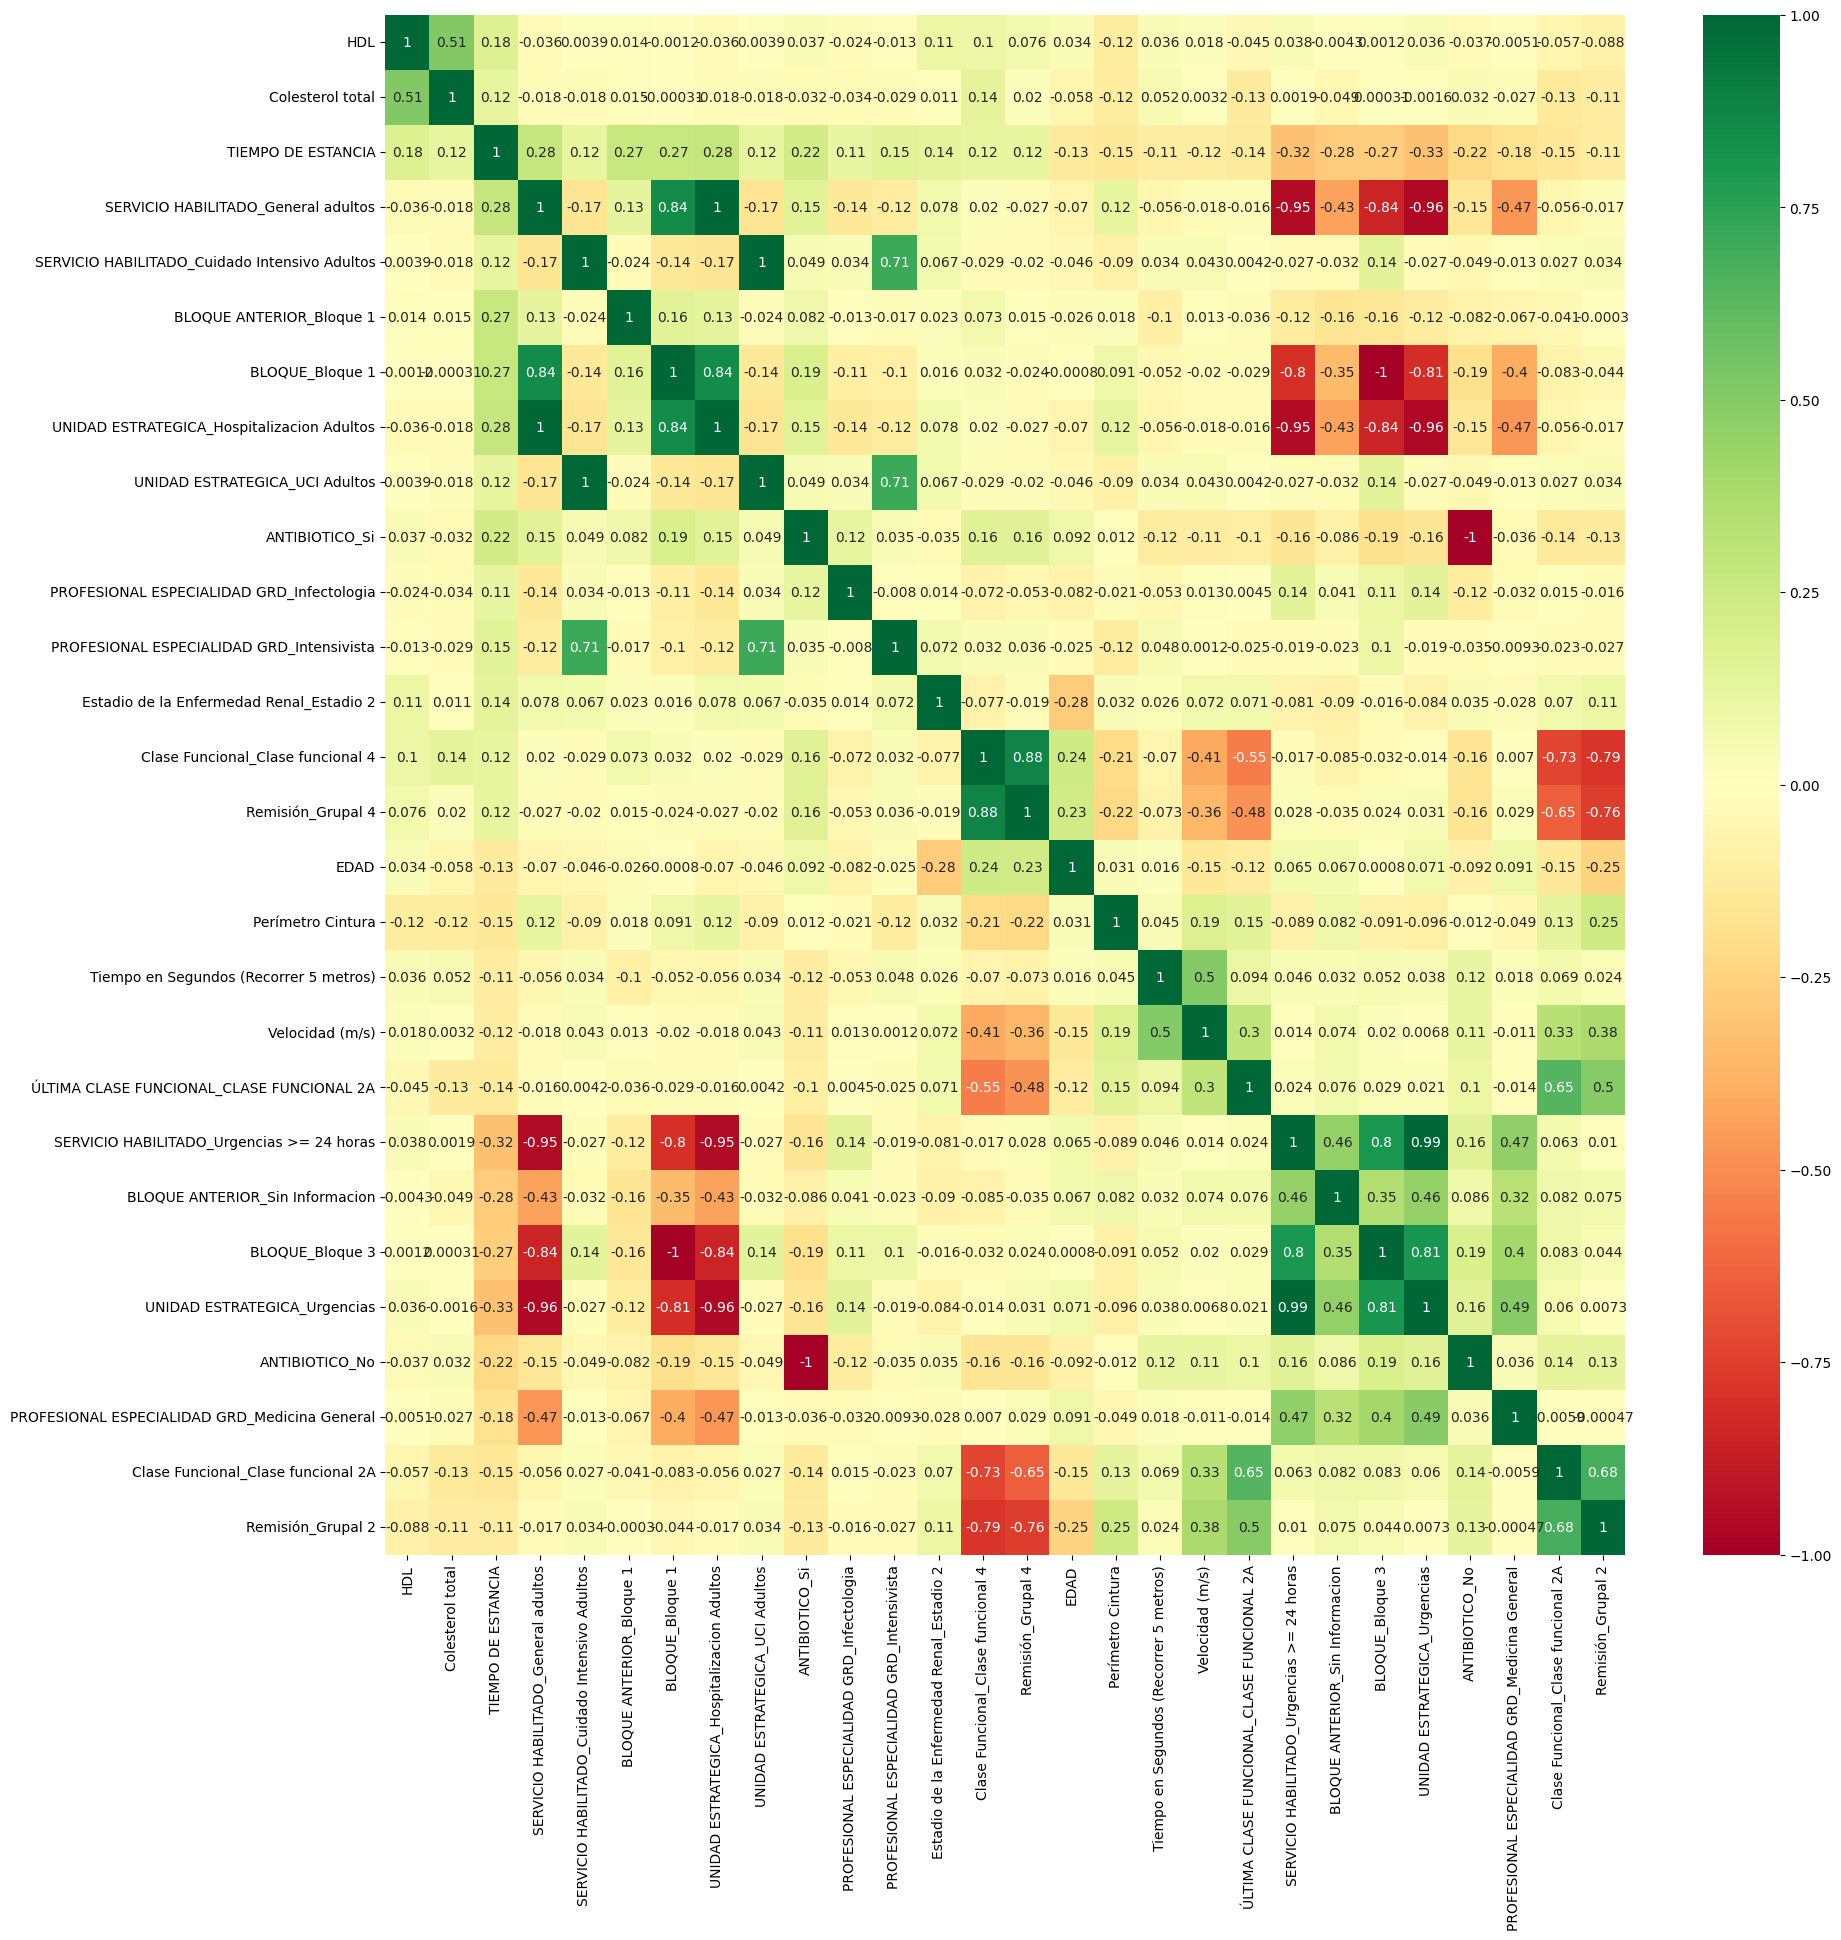

In [54]:
# se realiza un Mapa de calor correlaciones entre las variables de la base de datos df3_num con la variable objetivo TIEMPO DE ESTANCIA
plt.figure(figsize=(20,20))
sns.heatmap(df3_num.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [55]:
# analisis exploratorio de la columna TIEMPO DE ESTANCIA de la base de datos df3_num
df3_num["TIEMPO DE ESTANCIA"].describe() # se observa que el tiempo de estancia maximo es de 47 dias y el minimo de menos de 1 dia

count                        78900
mean     7 days 13:26:02.311081723
std      5 days 22:35:55.850263521
min         0 days 15:39:15.847000
25%         4 days 02:18:04.510000
50%         5 days 20:21:48.623000
75%         9 days 06:02:52.217000
max        47 days 19:56:11.493000
Name: TIEMPO DE ESTANCIA, dtype: object

In [56]:
#mostrar en nivel de correlacion de la variable TIEMPO DE ESTANCIA con las demas variables de la base de datos df3_num
df3_num.corr()["TIEMPO DE ESTANCIA"].sort_values(ascending=False)

TIEMPO DE ESTANCIA                               1.000000
SERVICIO HABILITADO_General adultos              0.280794
UNIDAD ESTRATEGICA_Hospitalizacion Adultos       0.280794
BLOQUE ANTERIOR_Bloque 1                         0.270390
BLOQUE_Bloque 1                                  0.266052
ANTIBIOTICO_Si                                   0.220571
HDL                                              0.175934
PROFESIONAL ESPECIALIDAD GRD_Intensivista        0.148763
Estadio de la Enfermedad Renal_Estadio 2         0.135284
Colesterol total                                 0.122316
Remisión_Grupal 4                                0.121882
SERVICIO HABILITADO_Cuidado Intensivo Adultos    0.120682
UNIDAD ESTRATEGICA_UCI Adultos                   0.120682
Clase Funcional_Clase funcional 4                0.119771
PROFESIONAL ESPECIALIDAD GRD_Infectologia        0.112829
Tiempo en Segundos (Recorrer 5 metros)          -0.111303
Remisión_Grupal 2                               -0.112095
Velocidad (m/s

In [57]:

# modificar Timestamp a solo dias en la base de datos df3_num tiempo de estancia  astype(dtype) es para cambiar el tipo de dato de la columna 
df3_num["TIEMPO DE ESTANCIA"]=df3_num["TIEMPO DE ESTANCIA"].astype('timedelta64[us]')



C:\Users\Juan\AppData\Local\Temp\ipykernel_6696\864539551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_num["TIEMPO DE ESTANCIA"]=df3_num["TIEMPO DE ESTANCIA"].astype('timedelta64[us]')


In [58]:
#pasar la columna TIEMPO DE ESTANCIA de la base de datos df3_num a dias y que las horas minutos o segundos sean decimales 
df3_num["TIEMPO DE ESTANCIA"]=df3_num["TIEMPO DE ESTANCIA"].apply(lambda x: x.days+x.seconds/86400)

C:\Users\Juan\AppData\Local\Temp\ipykernel_6696\3401779589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_num["TIEMPO DE ESTANCIA"]=df3_num["TIEMPO DE ESTANCIA"].apply(lambda x: x.days+x.seconds/86400)


In [59]:
#ver la columna TIEMPO DE ESTANCIA de la base de datos df3_num de mayor a menor
df3_num["TIEMPO DE ESTANCIA"].sort_values(ascending=False)  

554065    47.830683
553867    47.830683
553917    47.830683
553916    47.830683
553915    47.830683
            ...    
407179     0.652257
407178     0.652257
407174     0.652257
407173     0.652257
407220     0.652257
Name: TIEMPO DE ESTANCIA, Length: 78900, dtype: float64

In [60]:
#mostrar las variables de la base de datos df3_num 
df3_num.columns

Index(['HDL', 'Colesterol total', 'TIEMPO DE ESTANCIA',
       'SERVICIO HABILITADO_General adultos',
       'SERVICIO HABILITADO_Cuidado Intensivo Adultos',
       'BLOQUE ANTERIOR_Bloque 1', 'BLOQUE_Bloque 1',
       'UNIDAD ESTRATEGICA_Hospitalizacion Adultos',
       'UNIDAD ESTRATEGICA_UCI Adultos', 'ANTIBIOTICO_Si',
       'PROFESIONAL ESPECIALIDAD GRD_Infectologia',
       'PROFESIONAL ESPECIALIDAD GRD_Intensivista',
       'Estadio de la Enfermedad Renal_Estadio 2',
       'Clase Funcional_Clase funcional 4', 'Remisión_Grupal 4', 'EDAD',
       'Perímetro Cintura', 'Tiempo en Segundos (Recorrer 5 metros)',
       'Velocidad (m/s)', 'ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 2A',
       'SERVICIO HABILITADO_Urgencias >= 24 horas',
       'BLOQUE ANTERIOR_Sin Informacion', 'BLOQUE_Bloque 3',
       'UNIDAD ESTRATEGICA_Urgencias', 'ANTIBIOTICO_No',
       'PROFESIONAL ESPECIALIDAD GRD_Medicina General',
       'Clase Funcional_Clase funcional 2A', 'Remisión_Grupal 2'],
      dtype='o

C:\Users\Juan\AppData\Local\Temp\ipykernel_10496\2874638407.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3_num["ANTIBIOTICO_No"],label="ANTIBIOTICO_No",shade=True)
C:\Users\Juan\AppData\Local\Temp\ipykernel_10496\2874638407.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3_num["Clase Funcional_Clase funcional 2A"],label="Clase Funcional_Clase funcional 2A",shade=True)


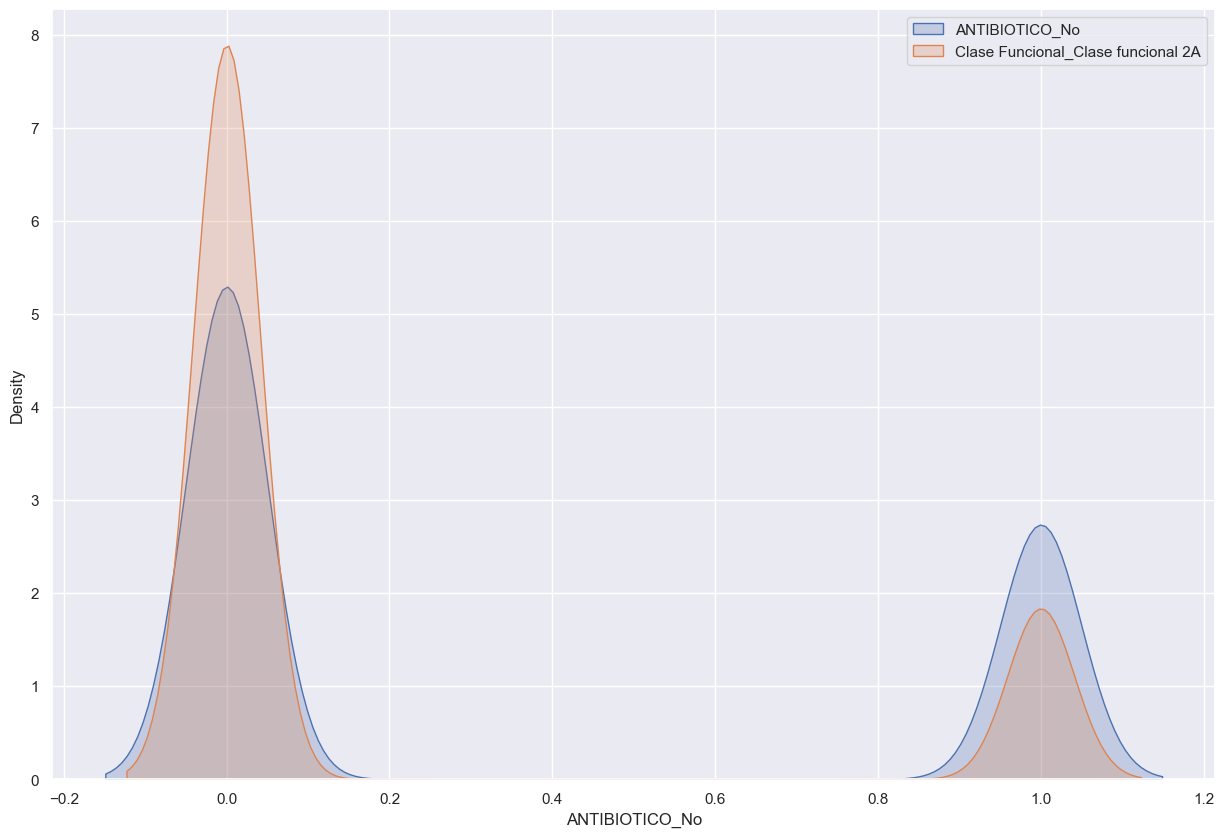

In [53]:
#Grafico de densidad entre las variables"ANTIBIOTICO_No","Clase Funcional_Clase funcional 2A" de la base de datos df3_num 
sns.kdeplot(df3_num["ANTIBIOTICO_No"],label="ANTIBIOTICO_No",shade=True)
sns.kdeplot(df3_num["Clase Funcional_Clase funcional 2A"],label="Clase Funcional_Clase funcional 2A",shade=True)
plt.legend()
plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_10496\3230781328.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3_num["Tiempo en Segundos (Recorrer 5 metros)"],label="Tiempo en Segundos (Recorrer 5 metros)",shade=True)
C:\Users\Juan\AppData\Local\Temp\ipykernel_10496\3230781328.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3_num["Velocidad (m/s)"],label="Velocidad (m/s)",shade=True)


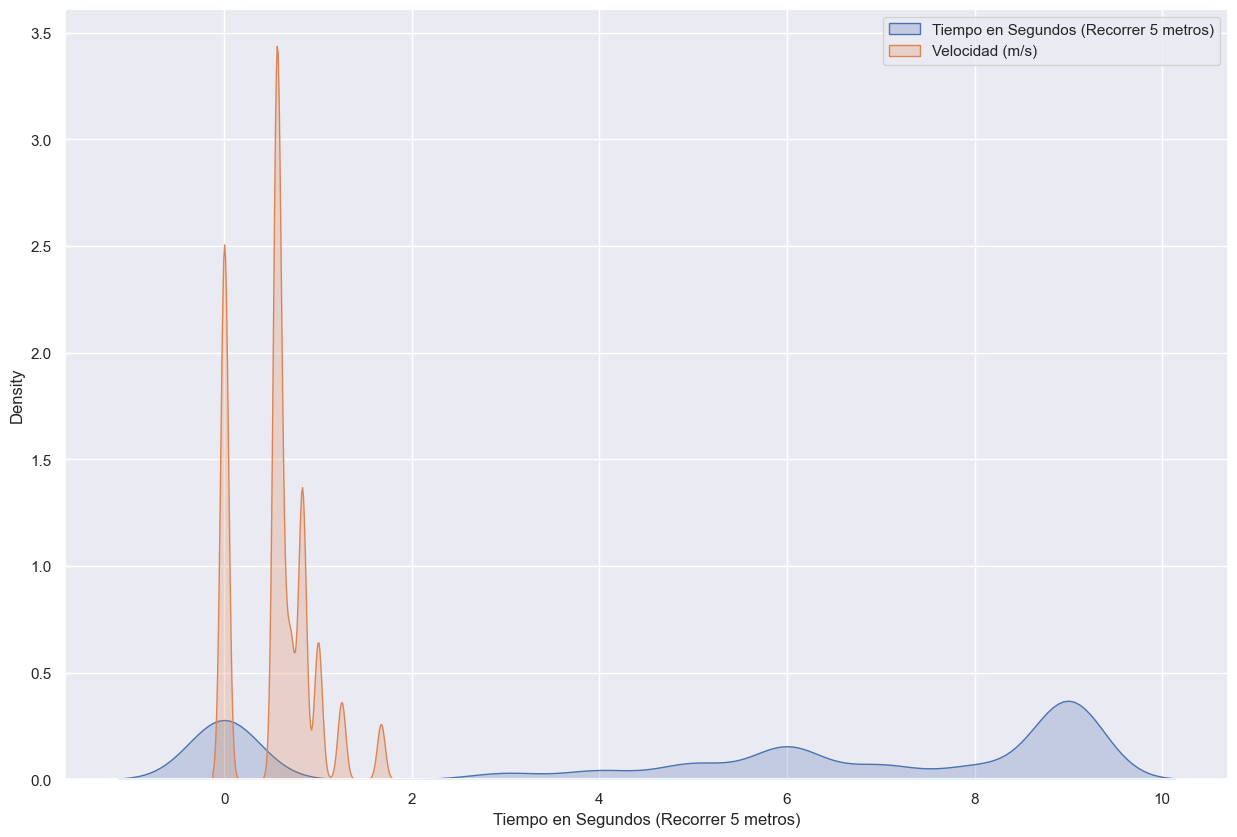

In [54]:
#Grafico de densidad entre las variables Tiempo en Segundos (Recorrer 5 metros),Tiempo en Segundos (Recorrer 5 metros) de la base de datos df3_num 
sns.kdeplot(df3_num["Tiempo en Segundos (Recorrer 5 metros)"],label="Tiempo en Segundos (Recorrer 5 metros)",shade=True)
sns.kdeplot(df3_num["Velocidad (m/s)"],label="Velocidad (m/s)",shade=True)
plt.legend()
plt.show()

C:\Users\Juan\AppData\Local\Temp\ipykernel_10496\4223028034.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3_num["EDAD"],label="EDAD)",shade=True)
C:\Users\Juan\AppData\Local\Temp\ipykernel_10496\4223028034.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3_num["Perímetro Cintura"],label="Perímetro Cintura",shade=True)


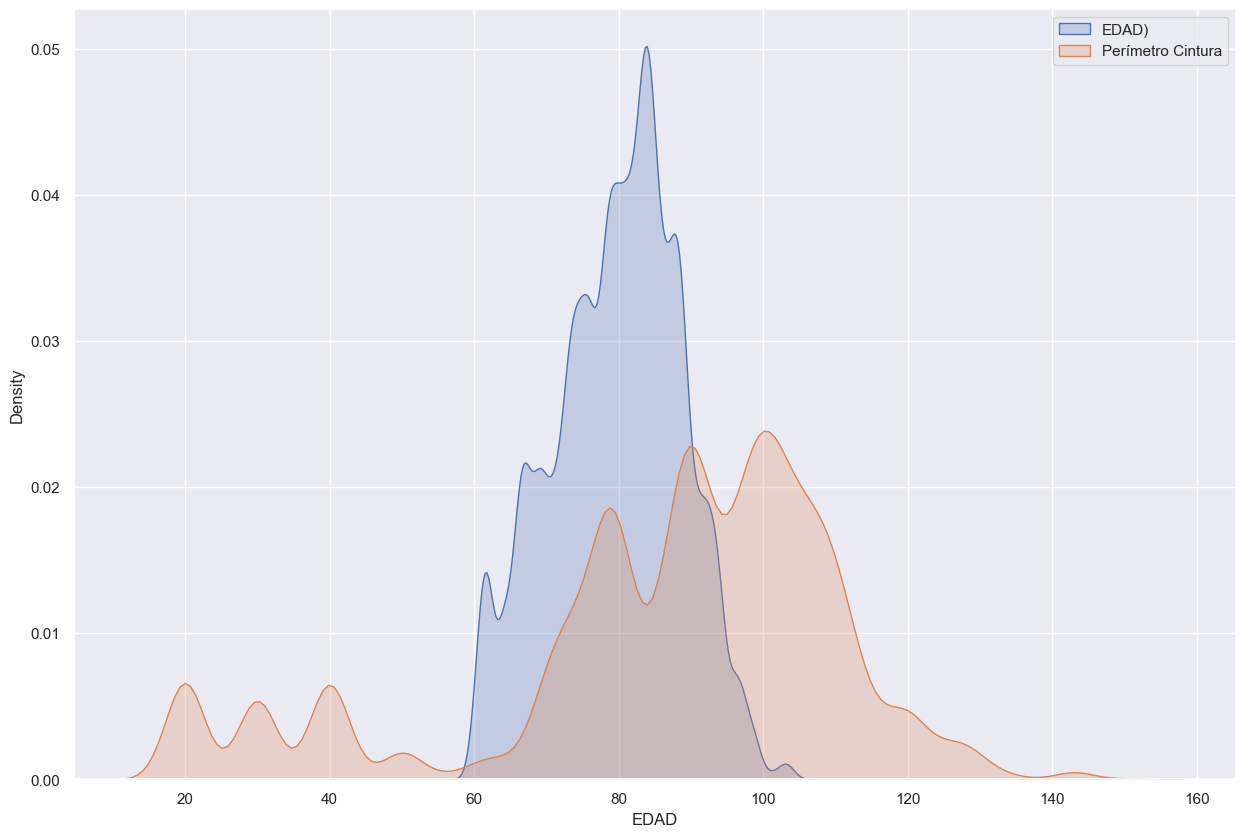

In [55]:
#Grafico de densidad entre las variables Tiempo en Segundos (Recorrer 5 metros),Tiempo en Segundos (Recorrer 5 metros) de la base de datos df3_num 
sns.kdeplot(df3_num["EDAD"],label="EDAD)",shade=True)
sns.kdeplot(df3_num["Perímetro Cintura"],label="Perímetro Cintura",shade=True)
plt.legend()
plt.show()

In [56]:
#Calcula estadísticas descriptivas (media, mediana, desviación estándar, mínimo, máximo) para las variables numéricas, incluyendo "HDL", "Colesterol total", "EDAD", "Perímetro Cintura", "Tiempo en Segundos (Recorrer 5 metros)", "Velocidad (m/s)"
df3_num[["HDL", "Colesterol total", "EDAD", "Perímetro Cintura", "Tiempo en Segundos (Recorrer 5 metros)", "Velocidad (m/s)"]].describe()


,HDL,Colesterol total,EDAD,Perímetro Cintura,Tiempo en Segundos (Recorrer 5 metros),Velocidad (m/s)
count,78900.000000,78900.000000,78900.000000,78900.000000,78900.000000,78900.000000
mean,43.361186,143.778750,79.683409,85.810545,5.409100,0.550358
std,16.811292,58.320504,8.865892,25.786413,3.601626,0.398650
min,0.000000,0.000000,60.000000,20.000000,0.000000,0.000000
25%,34.210000,112.600000,73.000000,78.000000,0.000000,0.000000
50%,42.210000,133.330000,81.000000,90.000000,6.000000,0.560000
75%,51.110000,168.400000,86.000000,102.000000,9.000000,0.830000
max,157.000000,375.100000,104.000000,150.000000,9.000000,1.670000


In [57]:
# en la columna colestero total de la base de datos df3_num reemplazar los valores mayores o iguales a 130 por 130
df3_num["Colesterol total"]=df3_num["Colesterol total"].apply(lambda x: 130 if x>=130 else x)
df3_num["Colesterol total"]=df3_num["Colesterol total"].apply(lambda x: 80 if x<=80 else x)

C:\Users\Juan\AppData\Local\Temp\ipykernel_10496\1593066774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_num["Colesterol total"]=df3_num["Colesterol total"].apply(lambda x: 130 if x>=130 else x)
C:\Users\Juan\AppData\Local\Temp\ipykernel_10496\1593066774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_num["Colesterol total"]=df3_num["Colesterol total"].apply(lambda x: 80 if x<=80 else x)


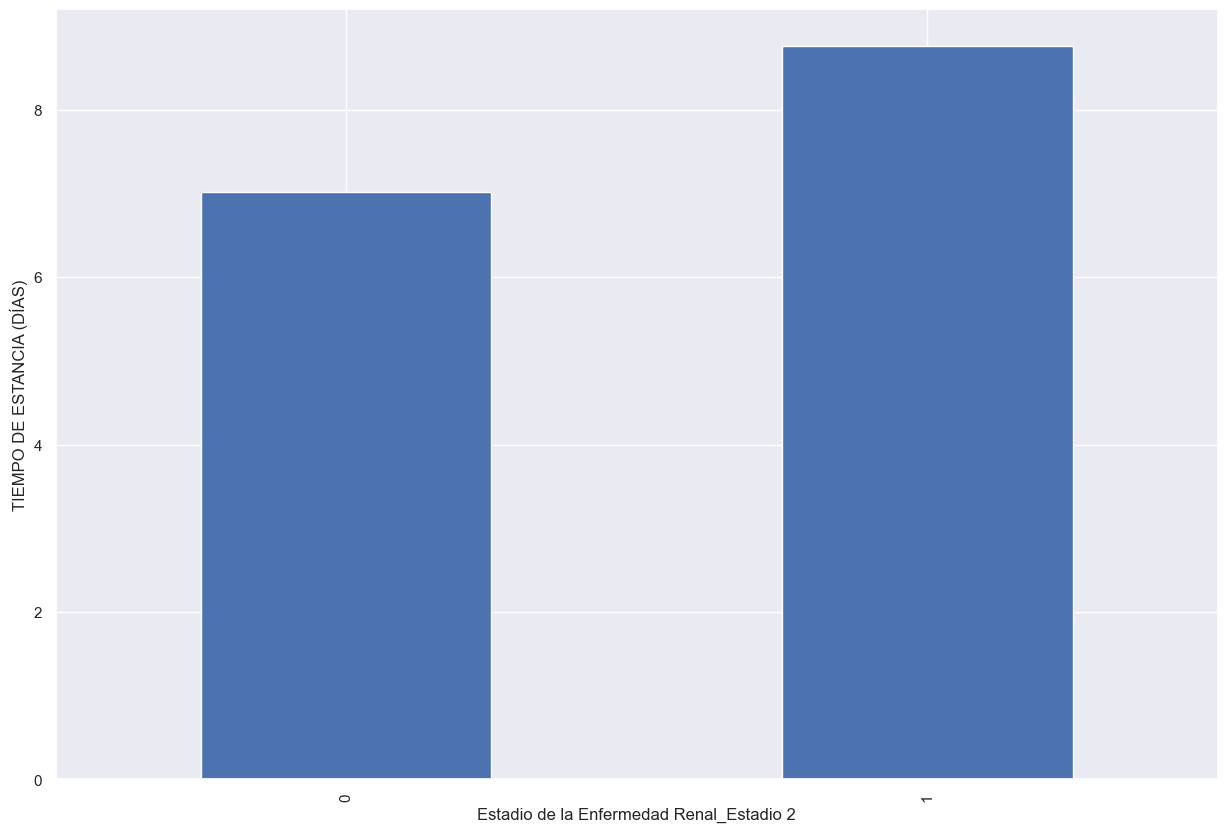

In [58]:
#"Estadio de la Enfermedad Renal_Estadio 2", puedes realizar un análisis de tendencias a lo largo del tiempo para evaluar cómo estas variables influyen en "TIEMPO DE ESTANCIA (DÍAS)".
df3_num.groupby("Estadio de la Enfermedad Renal_Estadio 2")["TIEMPO DE ESTANCIA"].mean().plot.bar()
plt.ylabel("TIEMPO DE ESTANCIA (DÍAS)")
plt.show()


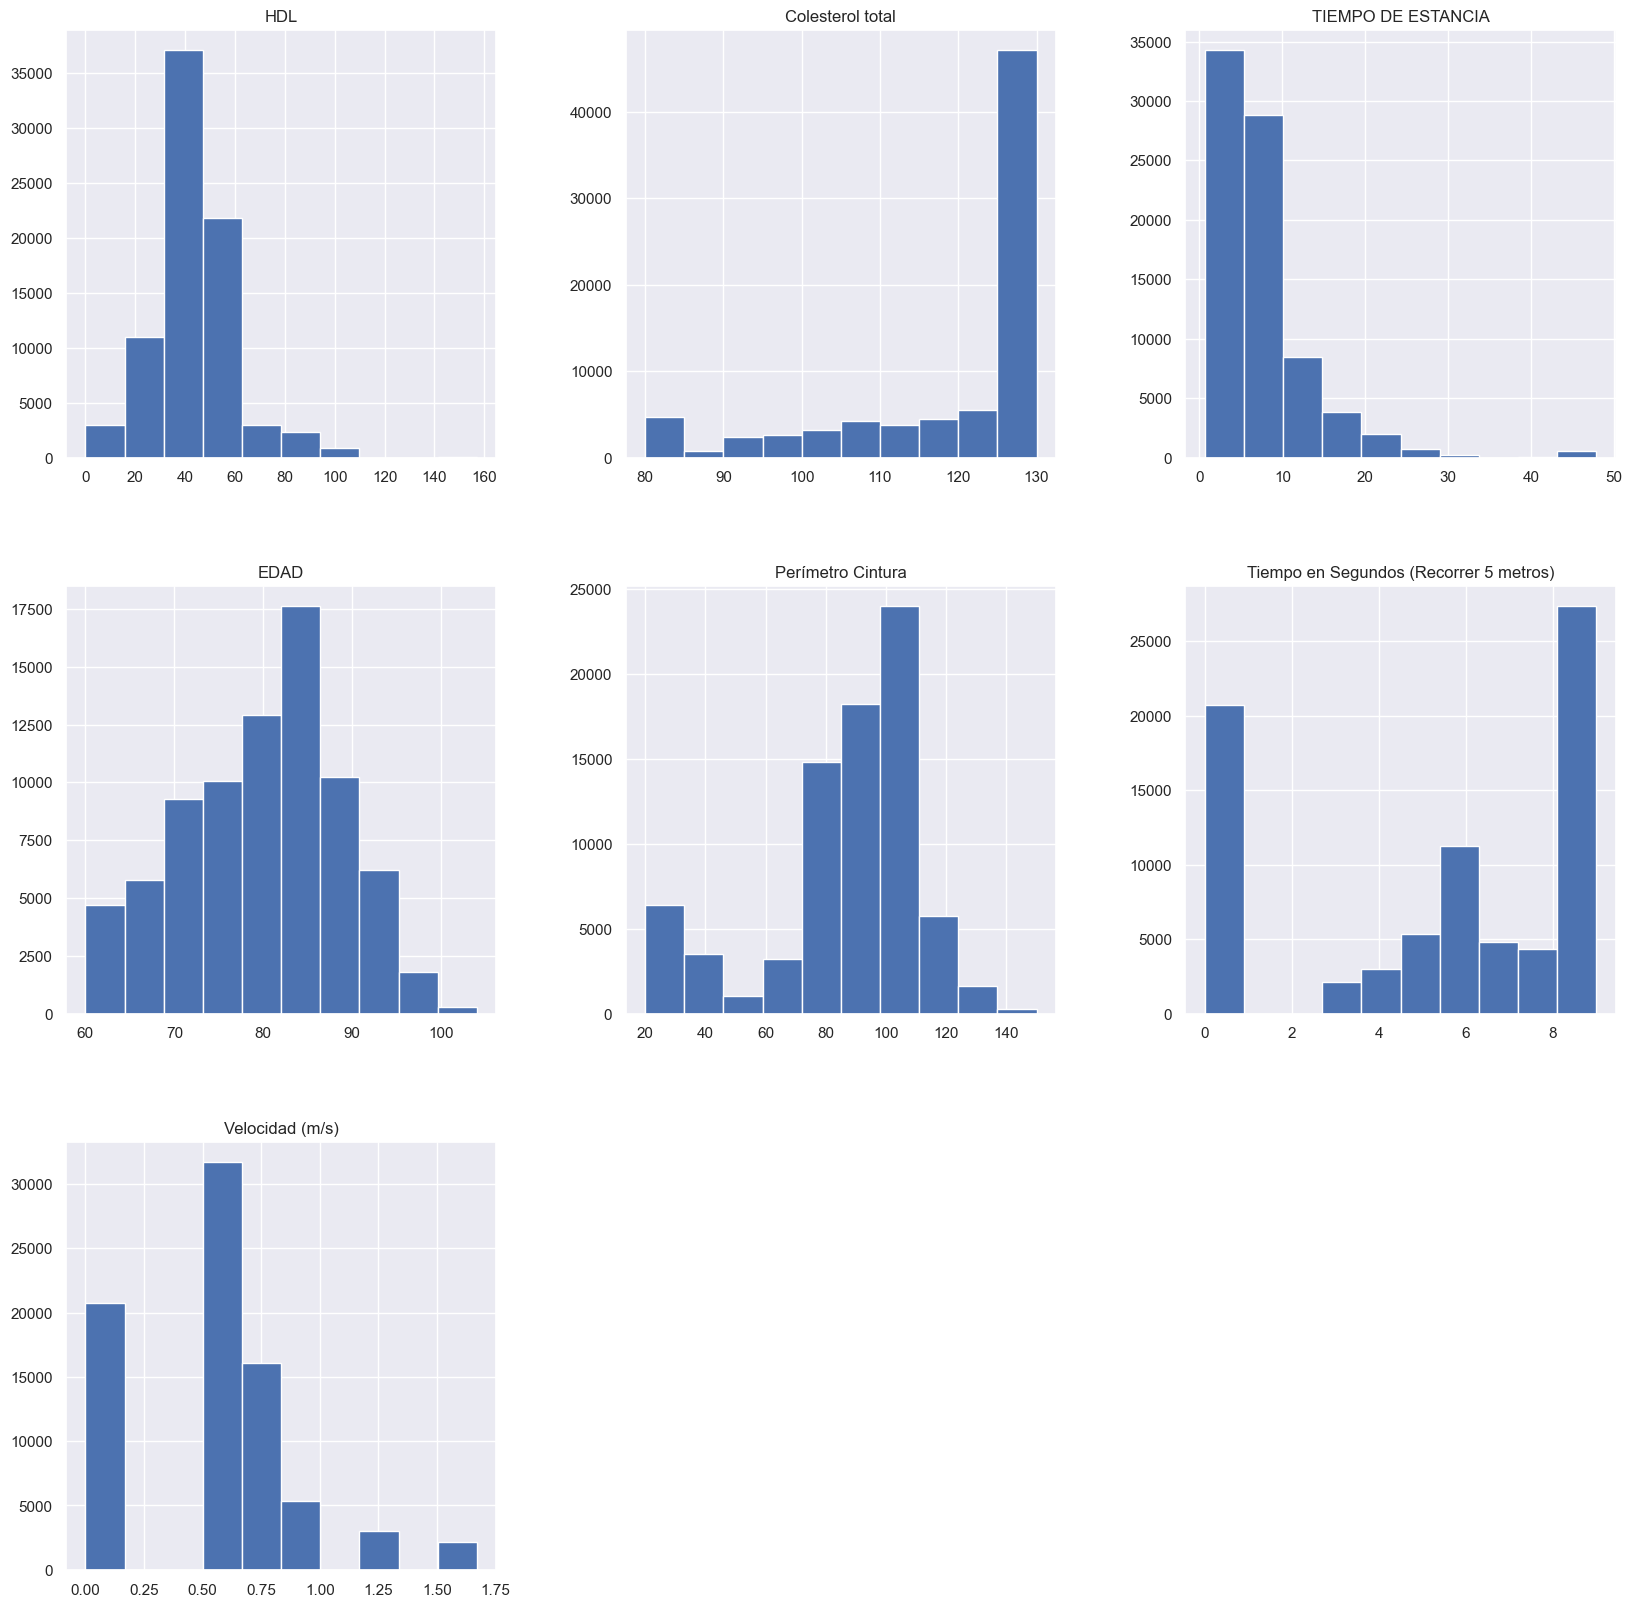

In [59]:
#Histogramas y Boxplots: Para entender la distribución de cada variable numérica. Esto es especialmente útil para variables como ''HDL', 'Colesterol total', 'TIEMPO DE ESTANCIA', 'SERVICIO HABILITADO_General adultos', 'SERVICIO HABILITADO_Cuidado Intensivo Adultos', 'BLOQUE ANTERIOR_Bloque 1', 'BLOQUE_Bloque 1', 'UNIDAD ESTRATEGICA_Hospitalizacion Adultos', 'UNIDAD ESTRATEGICA_UCI Adultos', 'ANTIBIOTICO_Si', 'PROFESIONAL ESPECIALIDAD GRD_Infectologia', 'PROFESIONAL ESPECIALIDAD GRD_Intensivista', 'Estadio de la Enfermedad Renal_Estadio 2', 'Clase Funcional_Clase funcional 4', 'Remisión_Grupal 4', 'EDAD', 'Perímetro Cintura', 'Tiempo en Segundos (Recorrer 5 metros)', 'Velocidad (m/s)', 'ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 2A', 'SERVICIO HABILITADO_Urgencias >= 24 horas', 'BLOQUE ANTERIOR_Sin Informacion', 'BLOQUE_Bloque 3', 'UNIDAD ESTRATEGICA_Urgencias', 'ANTIBIOTICO_No', 'PROFESIONAL ESPECIALIDAD GRD_Medicina General', 'Clase Funcional_Clase funcional 2A', 'Remisión_Grupal 2'
df3_num[["HDL", "Colesterol total", "TIEMPO DE ESTANCIA",    "EDAD", "Perímetro Cintura", "Tiempo en Segundos (Recorrer 5 metros)", "Velocidad (m/s)"]].hist(figsize=(20,20))
plt.show()

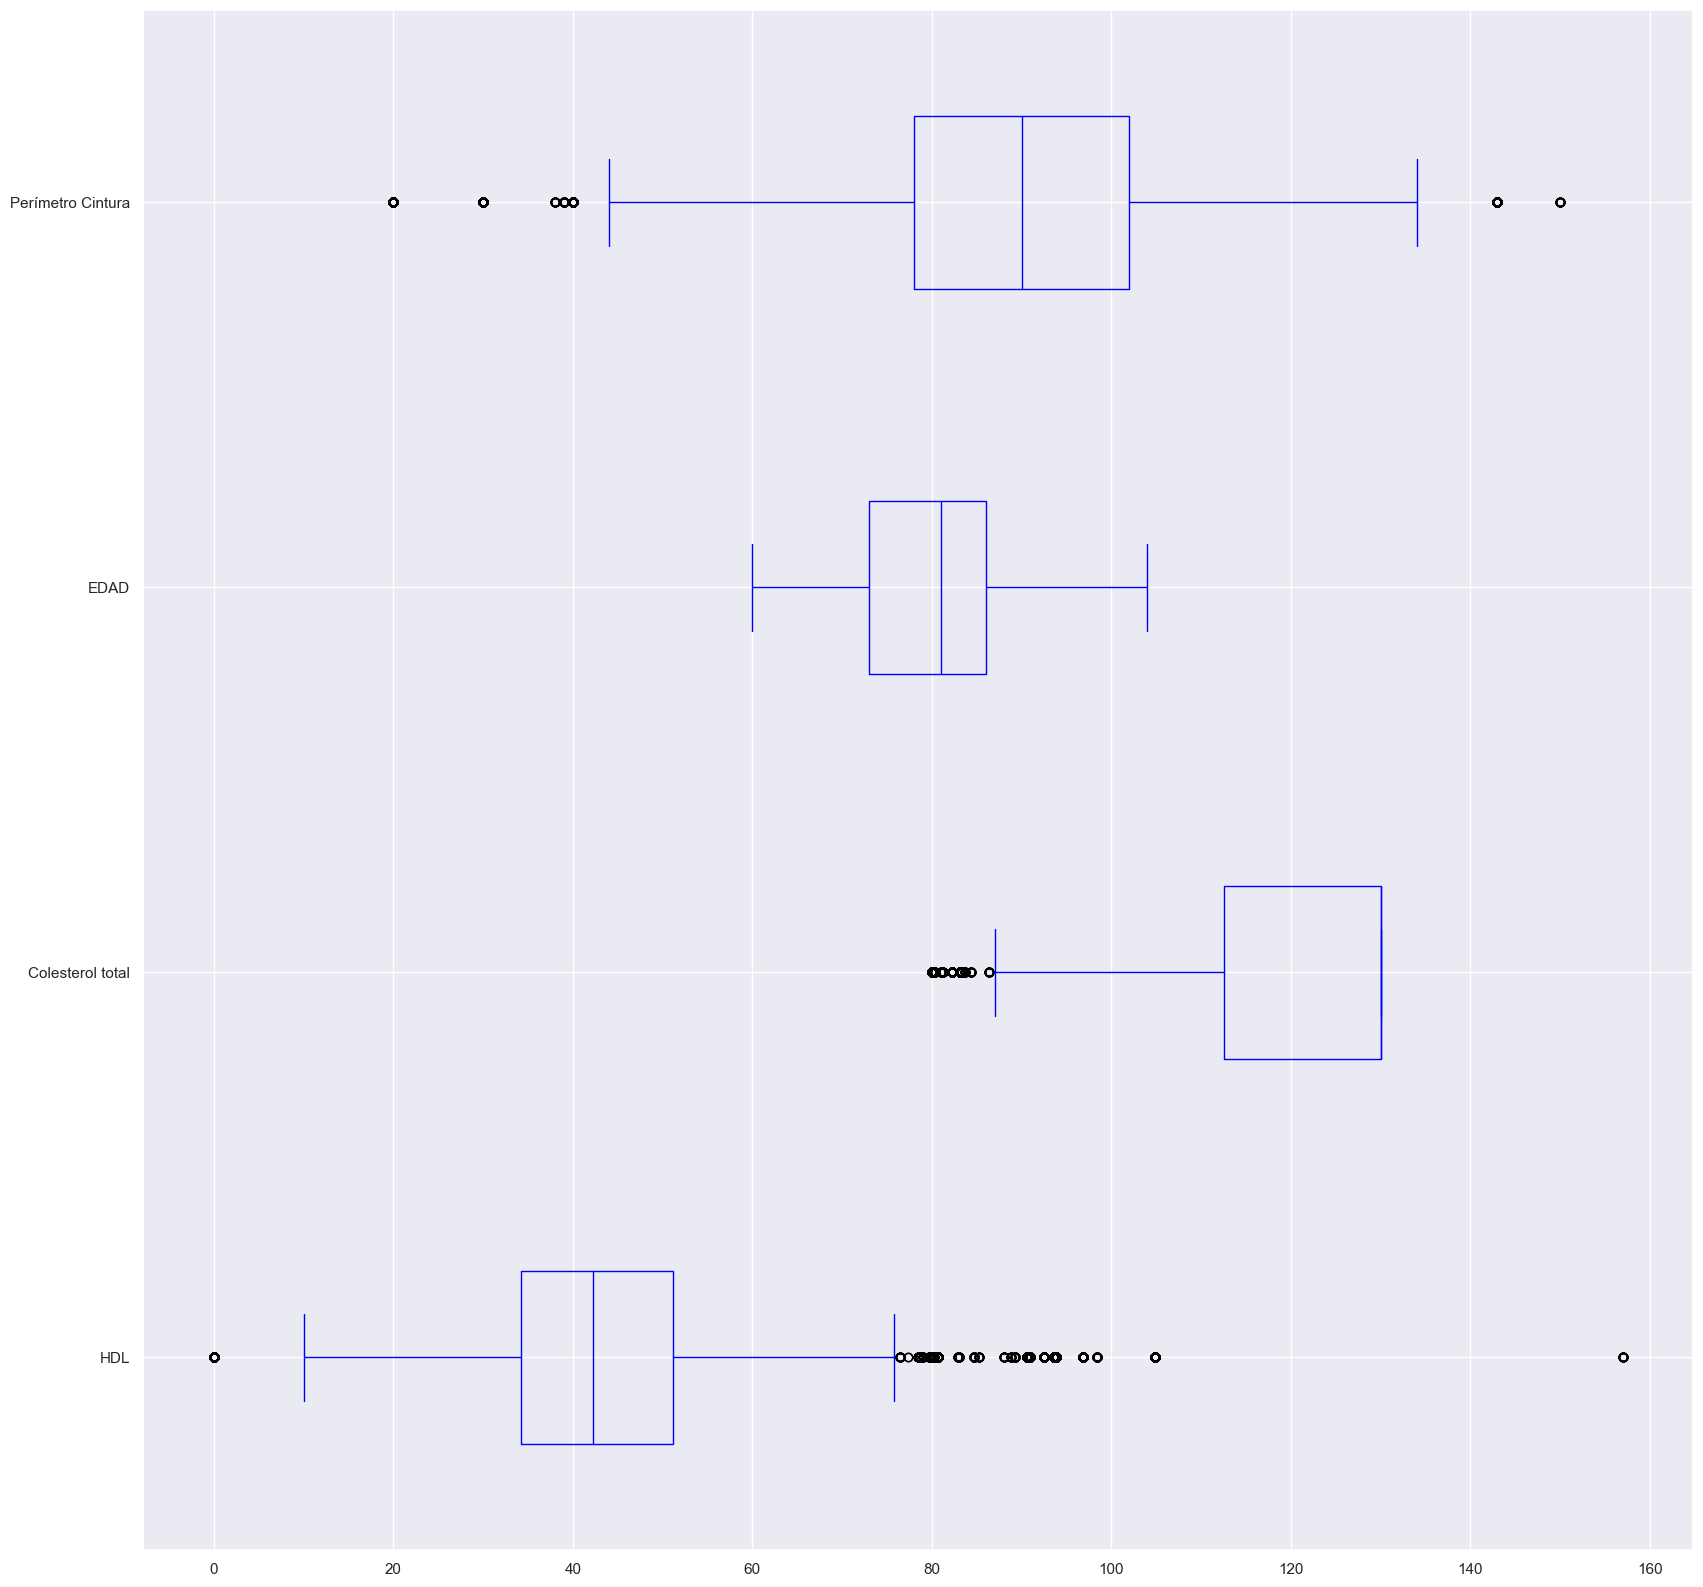

In [60]:
#hacer un box plot "HDL", "Colesterol total", "EDAD", "Perímetro Cintura" de color rojoy foondo naranja 
df3_num[["HDL", "Colesterol total", "EDAD", "Perímetro Cintura"]].plot.box(color="blue",patch_artist=False,figsize=(20,20),vert=False)
plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_10496\3687216130.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_num["TIEMPO DE ESTANCIA"],bins=100)


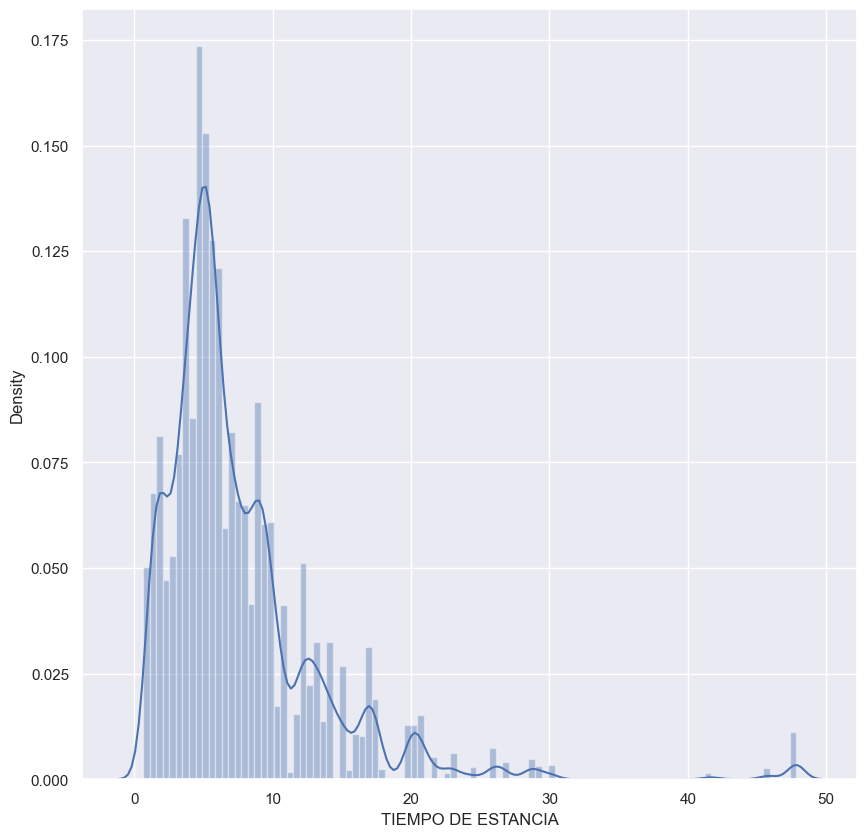

In [61]:
#hacer analisis exploratorio de la columna TIEMPO DE ESTANCIA con un histograma de la base de datos df3_num 
plt.figure(figsize=(10,10))
sns.distplot(df3_num["TIEMPO DE ESTANCIA"],bins=100)
plt.show()


## Escalamiento de variables

In [62]:
#escalamiento de variables from sklearn import preprocessing scaled_X = preprocessing.StandardScaler().fit_transform
from sklearn import preprocessing
scaled_X = preprocessing.StandardScaler().fit_transform(df3_num)
scaled_X = pd.DataFrame(scaled_X,columns=df3_num.columns)
scaled_X.head(5)




,HDL,Colesterol total,TIEMPO DE ESTANCIA,SERVICIO HABILITADO_General adultos,SERVICIO HABILITADO_Cuidado Intensivo Adultos,BLOQUE ANTERIOR_Bloque 1,BLOQUE_Bloque 1,UNIDAD ESTRATEGICA_Hospitalizacion Adultos,UNIDAD ESTRATEGICA_UCI Adultos,ANTIBIOTICO_Si,...,Velocidad (m/s),ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 2A,SERVICIO HABILITADO_Urgencias >= 24 horas,BLOQUE ANTERIOR_Sin Informacion,BLOQUE_Bloque 3,UNIDAD ESTRATEGICA_Urgencias,ANTIBIOTICO_No,PROFESIONAL ESPECIALIDAD GRD_Medicina General,Clase Funcional_Clase funcional 2A,Remisión_Grupal 2
0,0.359214,-0.376864,-0.10244,0.409232,-0.068173,-0.346328,0.47777,0.409232,-0.068173,0.718876,...,1.127918,-0.516348,-0.388935,2.128893,-0.47777,-0.391953,-0.718876,-0.192491,2.074142,1.768516
1,0.359214,-0.376864,-0.10244,0.409232,-0.068173,-0.346328,0.47777,0.409232,-0.068173,0.718876,...,1.755038,-0.516348,-0.388935,2.128893,-0.47777,-0.391953,-0.718876,-0.192491,2.074142,1.768516
2,0.460337,-0.388867,-0.10244,0.409232,-0.068173,-0.346328,0.47777,0.409232,-0.068173,0.718876,...,0.701476,-0.516348,-0.388935,2.128893,-0.47777,-0.391953,-0.718876,-0.192491,2.074142,1.768516
3,0.460337,-0.388867,-0.10244,0.409232,-0.068173,-0.346328,0.47777,0.409232,-0.068173,0.718876,...,1.127918,-0.516348,-0.388935,2.128893,-0.47777,-0.391953,-0.718876,-0.192491,2.074142,1.768516
4,0.359214,-0.376864,-0.10244,0.409232,-0.068173,-0.346328,0.47777,0.409232,-0.068173,0.718876,...,1.127918,1.936678,-0.388935,2.128893,-0.47777,-0.391953,-0.718876,-0.192491,2.074142,1.768516


##  División de datos en Train Test

In [63]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape  
#((63120, 27), (15780, 27), (63120,), (15780,))
#separar la base de datos df3_num_escalado en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X.drop(["TIEMPO DE ESTANCIA"],axis=1),scaled_X["TIEMPO DE ESTANCIA"], test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63120, 27), (15780, 27), (63120,), (15780,))

In [64]:
y_test

23944   -1.085752
46168   -0.473267
2623    -0.481497
30389   -0.906365
12678    0.907603
           ...   
77073   -0.359429
15235    0.156480
53127    1.572424
77742   -0.433080
37571   -0.447682
Name: TIEMPO DE ESTANCIA, Length: 15780, dtype: float64

## Modelamiento de Machine Learning

In [67]:
# Import Libraries for Evaluation of the Models 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score


In [68]:
#Logistic Regression Model  
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Print the metrics for the model performance
print("Linear Regression Model Performance:")
print("Mean Absolute Error (MAE):",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE):",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))
print("Cross Validation Score:",cross_val_score(lr,X_train,y_train,cv=10).mean()) 

Linear Regression Model Performance:
Mean Absolute Error (MAE): 0.5554239681998134
Mean Squared Error (MSE): 0.6506118614043842
Root Mean Squared Error (RMSE): 0.8066051459074534
R2 Score: 0.3200301999661743
Cross Validation Score: 0.3273621781989191


In [71]:
#Random Forest Classifier Model 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)# Print the metrics for the model performance
print("Random Forest Regressor Model Performance:")
print("Mean Absolute Error (MAE):",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE):",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))
print("Cross Validation Score:",cross_val_score(rf,X_train,y_train,cv=10).mean())


Random Forest Regressor Model Performance:
Mean Absolute Error (MAE): 0.056150364479190085
Mean Squared Error (MSE): 0.03083573884062716
Root Mean Squared Error (RMSE): 0.1756010787000671
R2 Score: 0.9677728421241857
Cross Validation Score: 0.965606293934135


In [72]:
#Regresión de apoyo vectorial (SVR) 
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)# Print the metrics for the model performance
print("Support Vector Regressor Model Performance:")
print("Mean Absolute Error (MAE):",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE):",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))




Support Vector Regressor Model Performance:
Mean Absolute Error (MAE): 0.27108085615572064
Mean Squared Error (MSE): 0.2557611687524772
Root Mean Squared Error (RMSE): 0.5057283547048526
R2 Score: 0.7326979708029842


In [73]:
#Regresión de Ridge 
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)# Print the metrics for the model performance
print("Ridge Regression Model Performance:")
print("Mean Absolute Error (MAE):",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE):",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))

Ridge Regression Model Performance:
Mean Absolute Error (MAE): 0.5552591452083881
Mean Squared Error (MSE): 0.6506078561031531
Root Mean Squared Error (RMSE): 0.8066026630895493
R2 Score: 0.3200343860009497


In [74]:
#Regresión de Lasso 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)# Print the metrics for the model performance
print("Lasso Regression Model Performance:")
print("Mean Absolute Error (MAE):",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE):",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))   

Lasso Regression Model Performance:
Mean Absolute Error (MAE): 0.6676484081935387
Mean Squared Error (MSE): 0.9568369910481016
Root Mean Squared Error (RMSE): 0.978180449123832
R2 Score: -1.2904873180286103e-05


## Conclusiones

Random Forest Regressor se destaca como el mejor modelo en términos de precisión y capacidad de ajuste a los datos. Tiene un bajo MAE, MSE y RMSE, lo que indica que sus predicciones se acercan a los valores reales. Además, su R2 Score (0.968) sugiere que el modelo explica una gran parte de la variabilidad en los datos, y la puntuación de validación cruzada también es alta, lo que indica una buena capacidad de generalización.

Support Vector Regressor también muestra un buen rendimiento, pero con un MAE, MSE y RMSE bajos. El R2 Score de 0.733 indica que el modelo explica una cantidad significativa de la variabilidad en los datos.

Linear Regression, Ridge Regression y Lasso Regression tienen un rendimiento bajo en comparación con los modelos anteriores. Tienen MAE, MSE y RMSE  altos, y el R2 Score es significativamente bajo, lo que sugiere que estos modelos no se ajustan bien a los datos y explican menos variabilidad. 

## Recomendaciones

Se pueden implementar estrategias que maximicen la utilización de estos recursos. Por medio de una gestión efectiva de la atención ambulatoria y domiciliaria, garantizando que los pacientes reciban el nivel de atención adecuado según su "clase funcional" y necesidades específicas.

Además asegurar que los factores de riesgo sean controlados de manera efectiva para los pacientes en las "Clases Funcionales 1, 2A, 2B y 3". Esto ayuda a prevenir complicaciones y reducir la necesidad de hospitalizació.

Dado que el modelo Random Forest Regressor ha mostrado un rendimiento superior en términos de precisión y capacidad de generalización, se recomienda utilizar este modelo para predecir el uso mensual de recursos, para la población bajo la modalidad de Pago Global Prospectivo (PGP). Este modelo puede ayudar a estimar con mayor precisión la demanda de servicios de salud para diferentes clases funcionales de pacientes. se recomienda realizar una evaluación continua del modelo a medida que se recopilan más datos. Los modelos de aprendizaje automático pueden necesitar actualizaciones periódicas para adaptarse a los cambios en los patrones de salud de la població

Tambien es importante tener en cuenta los pacientes de Clase Funcional 2B y 3 tienen morbilidades no controladas y/o factores de riesgo presentes. Estos pacientes pueden requerir una atención más intensiva para controlar sus condiciones de salud y reducir los factores de riesgo.

por ultimo, brindar capacitación al personal encargado de registrar e ingresar la información, enfocándose en la importancia de los datos recopilados. Esto asegurará que se mantenga la actualización de la base de datos y se eviten los datos atípicos o faltantes.